In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, SimpleRNN, Dropout
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense

In [ ]:
symbol = 'META'
data = yf.download(symbol, start='2003-11-23', end='2023-11-23')
data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200
...,...,...,...,...,...,...
2023-11-16,329.369995,334.579987,326.380005,334.190002,334.190002,18932600
2023-11-17,330.260010,335.500000,329.350006,335.040009,335.040009,14494400
2023-11-20,334.890015,341.869995,334.190002,339.970001,339.970001,16960500


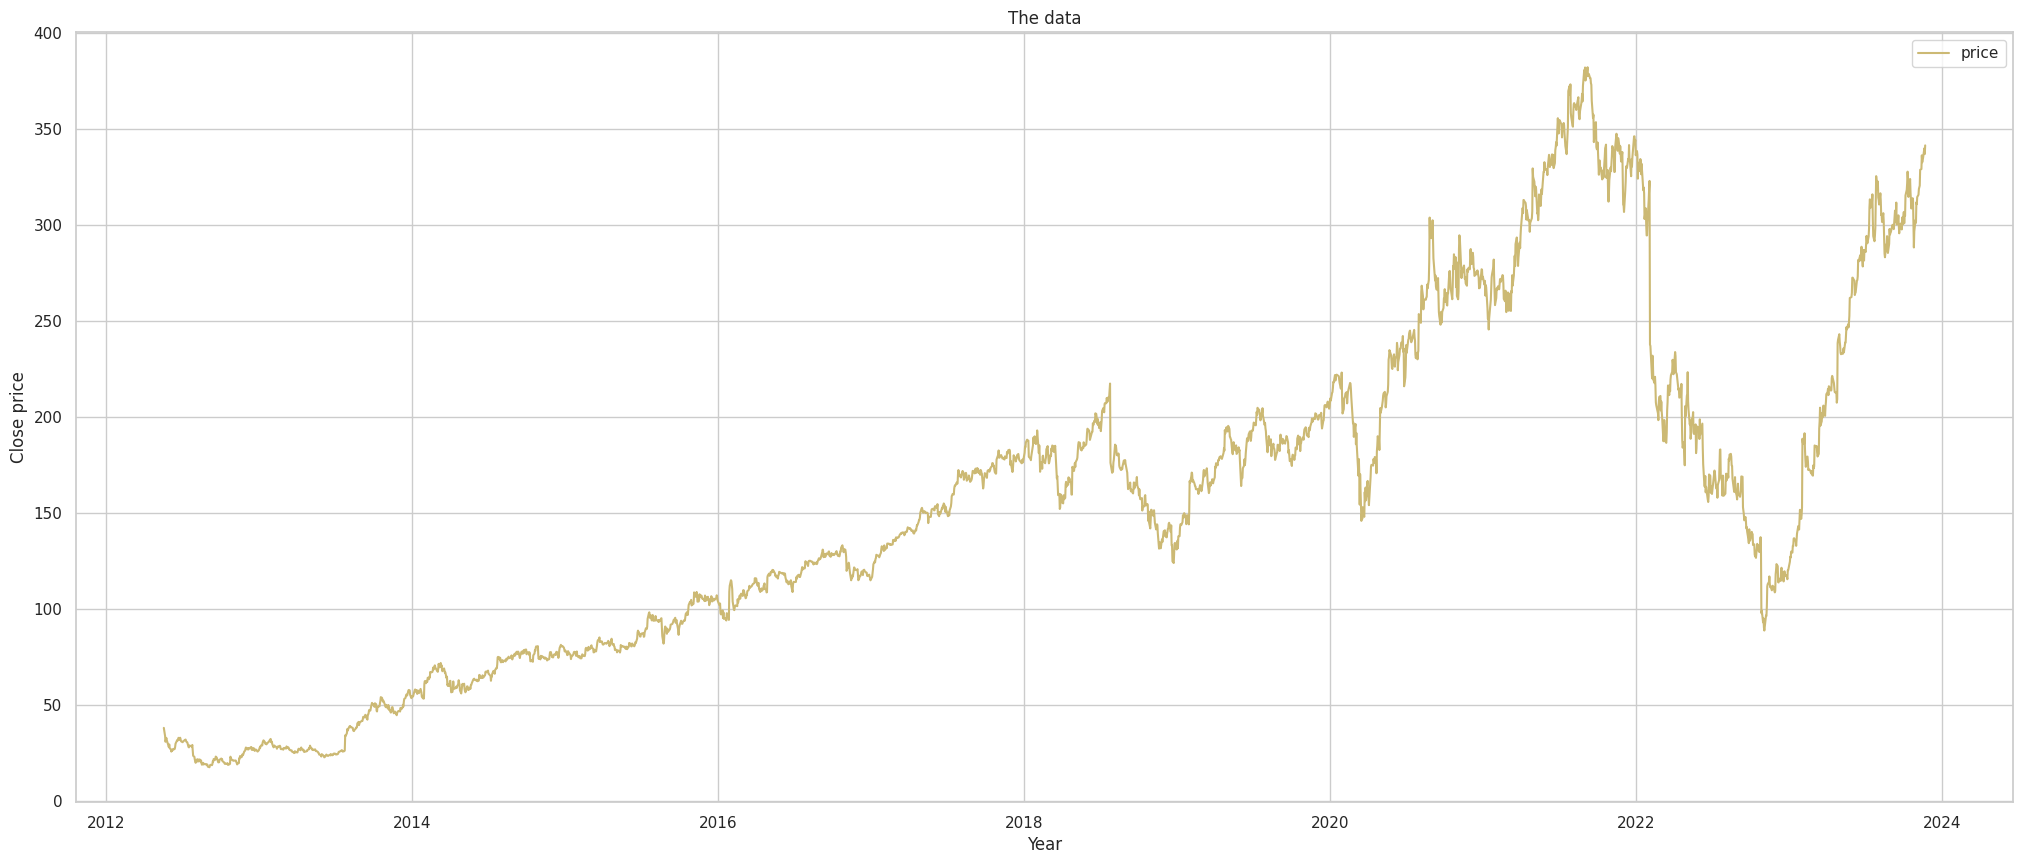

In [ ]:
plt.figure(figsize = (25,10))
plt.plot(data.index,data['Close'].values, color = "y", label = "price" )
plt.xlabel("Year")
plt.ylabel("Close price")
plt.title("The data")
plt.legend()
plt.show()

In [ ]:
data = data.reset_index(level=0)

In [ ]:
train_ratio = 0.7
len_train = round(len(data) * train_ratio)
len_val = len(data) - len_train

In [ ]:
print("Train size:", len_train)
print("Validation size:", len_val)

Train size: 2029
Validation size: 869


In [ ]:
train = data[:len_train].loc[:,['Date','Close']]
train['Date'] = pd.to_datetime(train['Date'])

In [ ]:
test = data[len_train:].loc[:,['Date','Close']]
test['Date'] = pd.to_datetime(test['Date'])

In [ ]:
train = np.reshape(train.Close.values, (-1,1))
scaler = MinMaxScaler(feature_range = (0,1))
train = scaler.fit_transform(train)

In [ ]:
test = np.reshape(test.Close.values, (-1,1))
scaler = MinMaxScaler(feature_range = (0,1))
test = scaler.fit_transform(test)

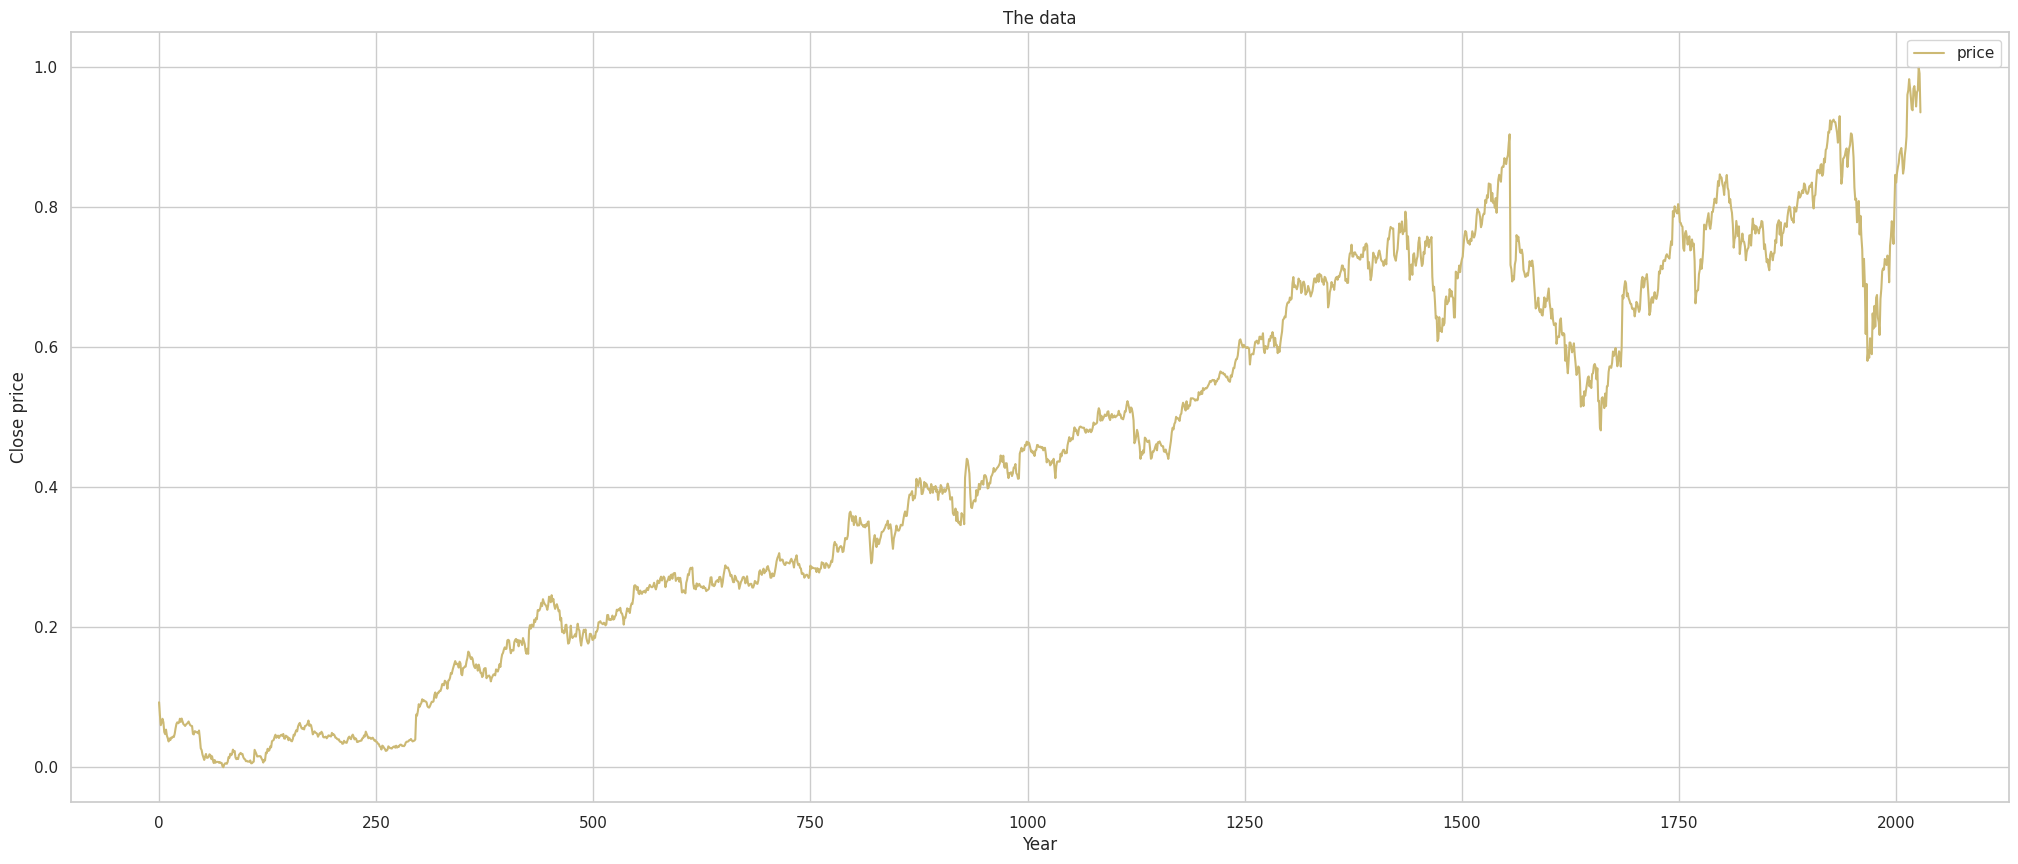

In [ ]:
# Set the style to 'seaborn'
sns.set(style="whitegrid")

# Your existing code
plt.figure(figsize=(25, 10))
plt.plot(train, color="y", label="price")
plt.xlabel("Year")
plt.ylabel("Close price")
plt.title("The data")
plt.legend()
plt.show()

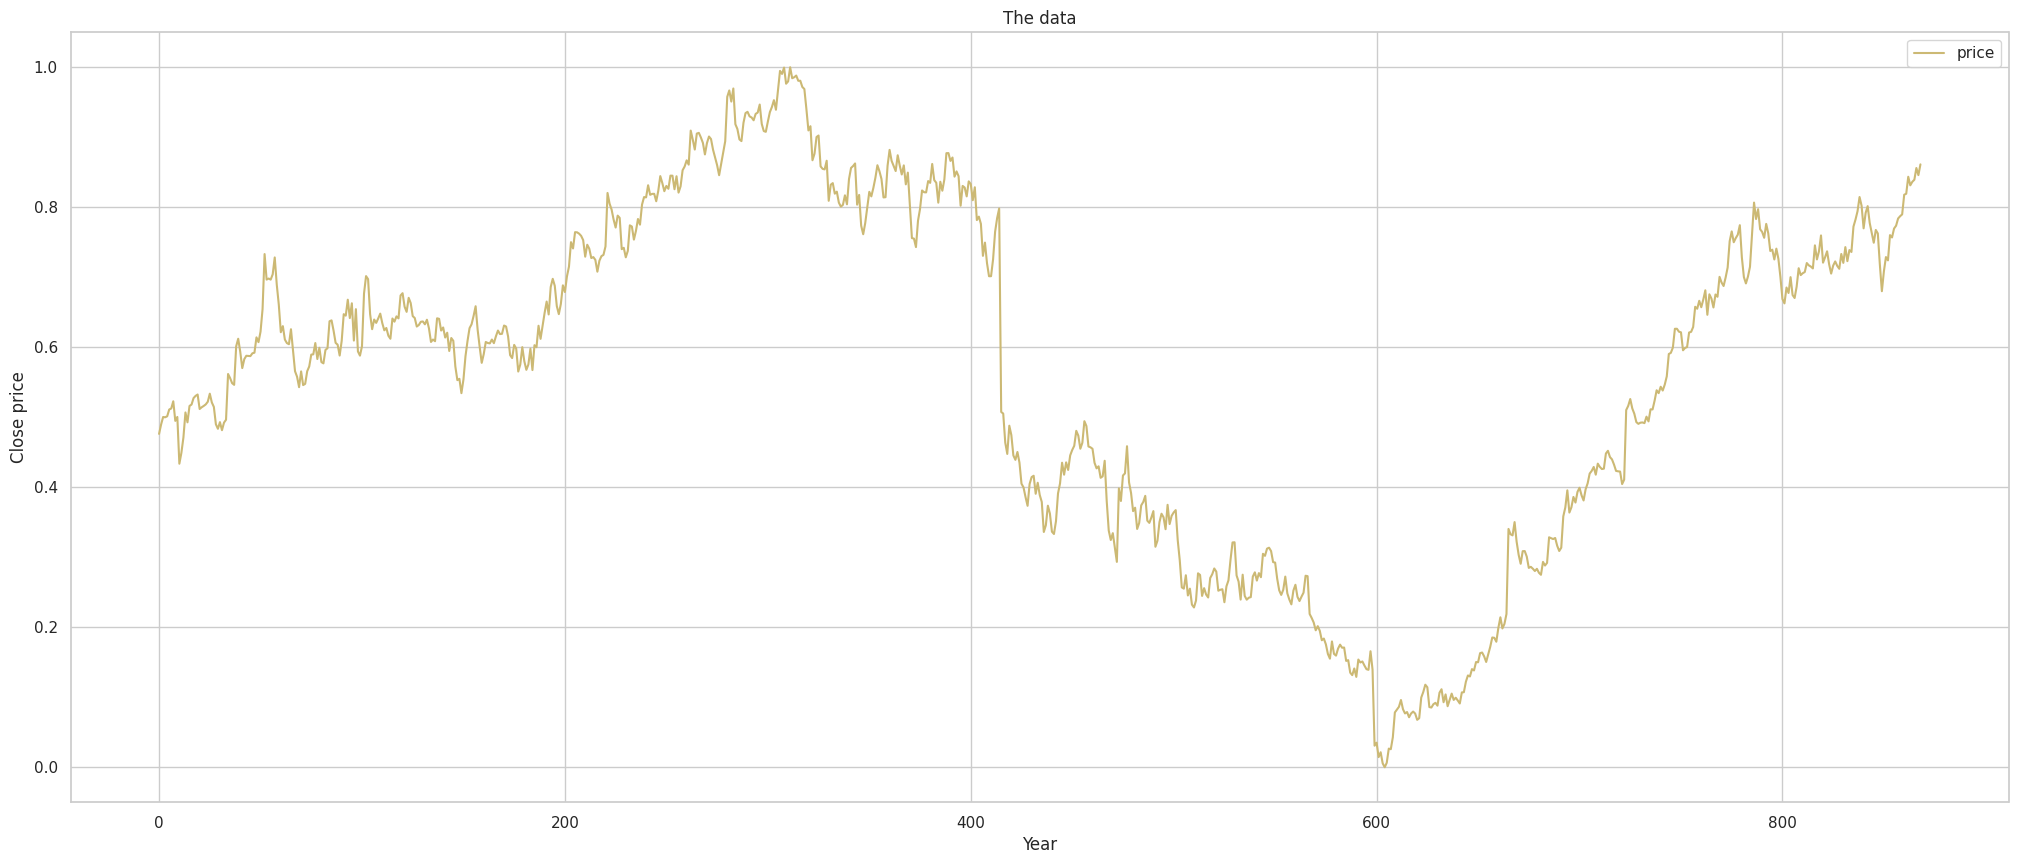

In [ ]:
# Set the style to 'seaborn'
sns.set(style="whitegrid")

# Your existing code
plt.figure(figsize=(25, 10))
plt.plot(test, color="y", label="price")
plt.xlabel("Year")
plt.ylabel("Close price")
plt.title("The data")
plt.legend()
plt.show()

In [ ]:
X_train = []
y_train = []

time_step = 30

for i in range(time_step, len_train):
    X_train.append(train[i-time_step:i,0])
    y_train.append(train[i,0])

# convert list to array
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))

print("Shape of X_train before reshape :",X_train.shape)
print("Shape of y_train before reshape :",y_train.shape)

Shape of X_train before reshape : (1999, 30, 1)
Shape of y_train before reshape : (1999, 1)


In [ ]:
import numpy as np

def create_time_series_data(data, time_step):
    X = []
    y = []

    for i in range(time_step, len(data)):
        X.append(data[i - time_step:i, 0])
        y.append(data[i, 0])

    # Convert lists to arrays
    X, y = np.array(X), np.array(y)

    # Reshape arrays
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))
    y = np.reshape(y, (y.shape[0], 1))

    return X, y

time_step = 30
X_train, y_train = create_time_series_data(train, time_step)

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)


Shape of X_train: (1999, 30, 1)
Shape of y_train: (1999, 1)


In [ ]:
X_test, y_test = create_time_series_data(test, time_step)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_test: (839, 30, 1)
Shape of y_test: (839, 1)


In [ ]:
y_train_original = scaler.inverse_transform(y_train)
y_test_original = scaler.inverse_transform(y_test)


**SIMPLE RNN**

ADAM optimizer

In [ ]:
model_rnn1 = Sequential()
model_rnn1.add(SimpleRNN(50, input_shape=(X_train.shape[1], 1)))
model_rnn1.add(Dense(1))
model_rnn1.compile(optimizer='adam', loss='mean_squared_error')
model_rnn1.summary()
history_simpleRNN_1 = model_rnn1.fit(X_train, y_train, epochs=50, batch_size=32)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 50)                2600      
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 2651 (10.36 KB)
Trainable params: 2651 (10.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
63/63 [==============================] - 1s 4ms/step - loss: 0.0191
Epoch 2/50
63/63 [==============================] - 0s 4ms/step - loss: 5.8539e-04
Epoch 3/50
63/63 [==============================] - 0s 4ms/step - loss: 4.9011e-04
Epoch 4/50
63/63 [==============================] - 0s 4ms/step - loss: 4.4538e-04
Epoch 5/50
63/63 [==============================] - 0s 4ms/step - loss: 3.9320e-04
Epoch

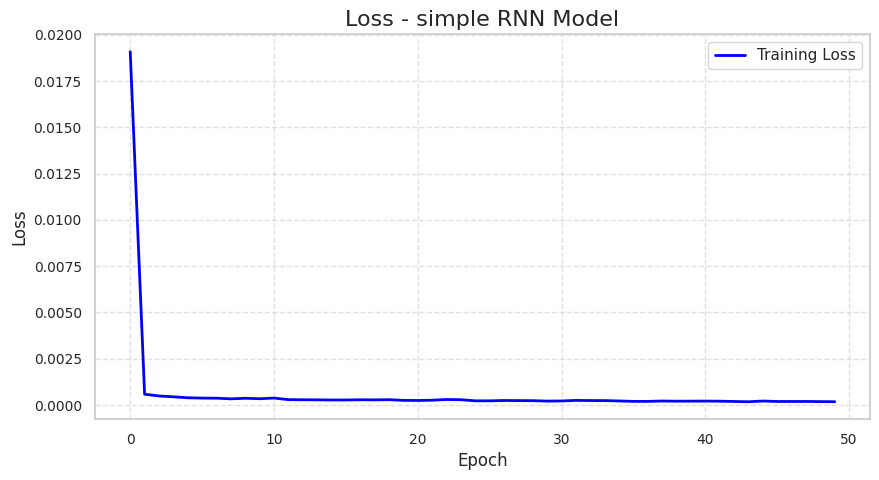

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history_simpleRNN_1.history["loss"], label="Training Loss", color='blue', linestyle='-', linewidth=2)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

plt.tick_params(axis='both', which='both', labelsize=10)
plt.title("Loss - simple RNN Model", fontsize=16)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Loss", fontsize=12)

plt.show()

63/63 [==============================] - 0s 2ms/step


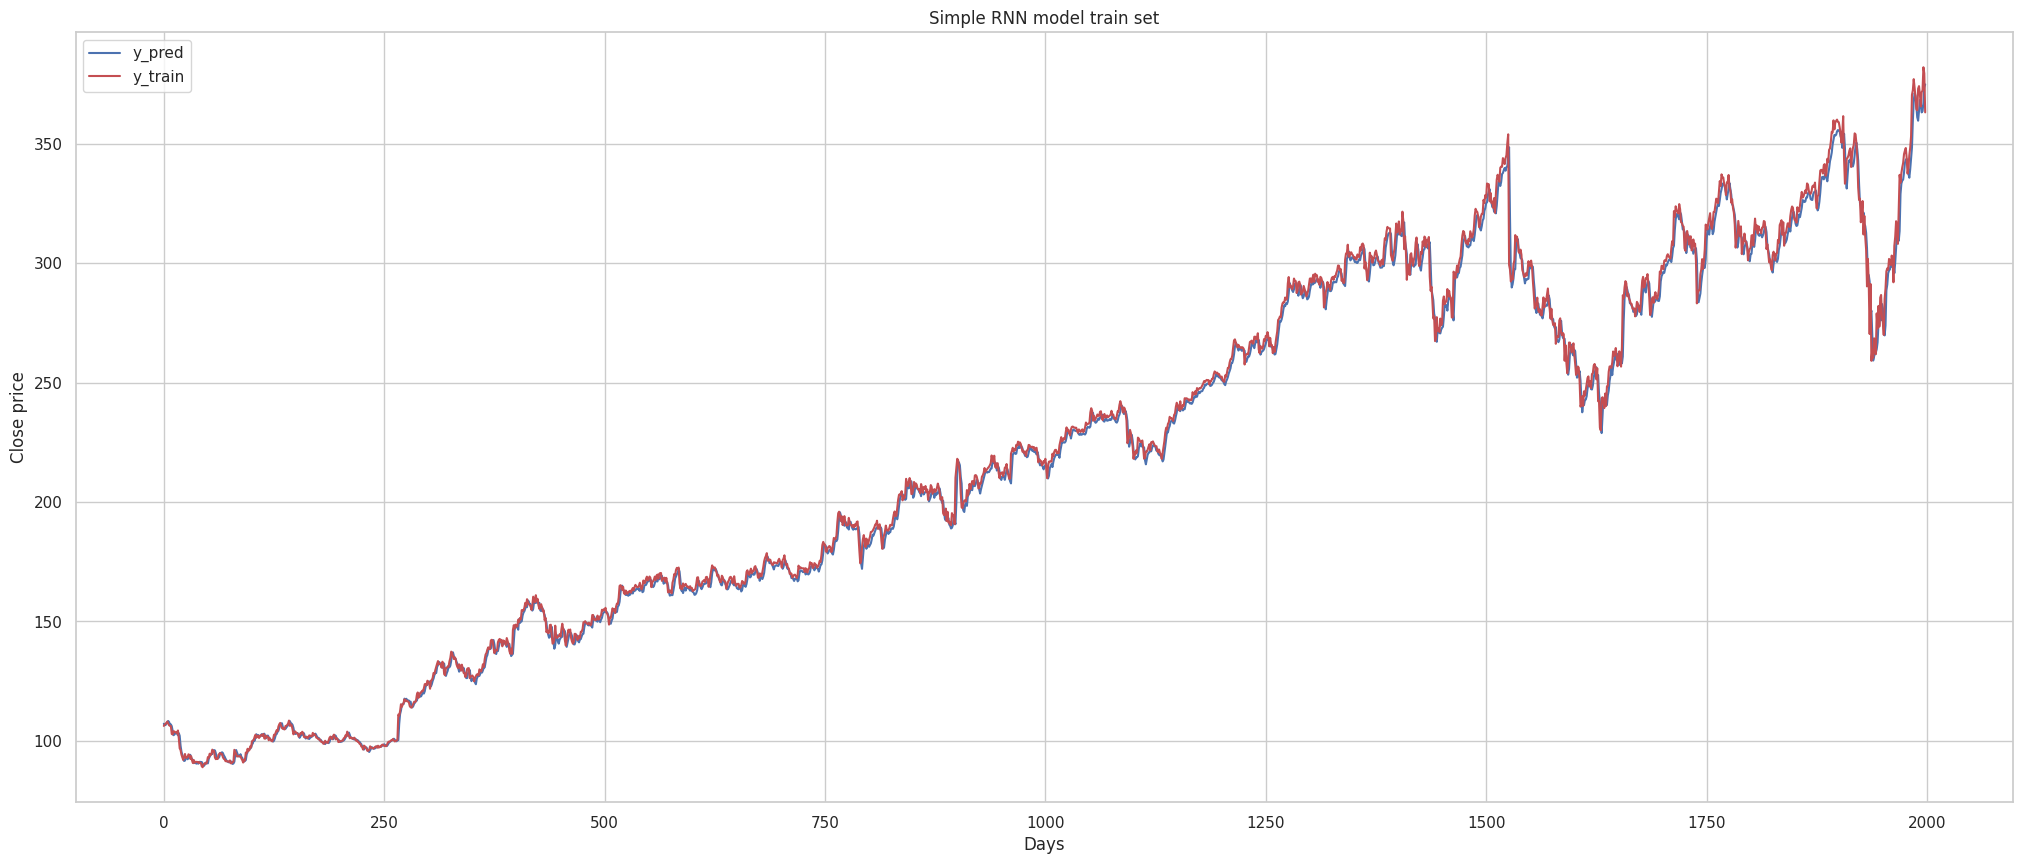

In [ ]:
y_train_pred_rnn1 = model_rnn1.predict(X_train)
y_train_pred_rnn1 = scaler.inverse_transform(y_train_pred_rnn1)

# Set the style to 'seaborn'
sns.set(style="whitegrid")
plt.figure(figsize = (25,10))
plt.plot(y_train_pred_rnn1, color = "b", label = "y_pred" )
plt.plot(y_train_original , color = "r", label = "y_train")
plt.xlabel("Days")
plt.ylabel("Close price")
plt.title("Simple RNN model train set")
plt.legend()
plt.show()

In [ ]:
pred_error = y_train_pred_rnn1 - y_train_original
print(f'Max error: {np.max(np.abs(pred_error)):.2f}')
print(f'Min error: {np.min(np.abs(pred_error)):.2f}')
print(f'Mean error: {np.mean(np.abs(pred_error)):.2f}')

Max error: 49.32
Min error: 0.00
Mean error: 2.71


27/27 [==============================] - 0s 2ms/step


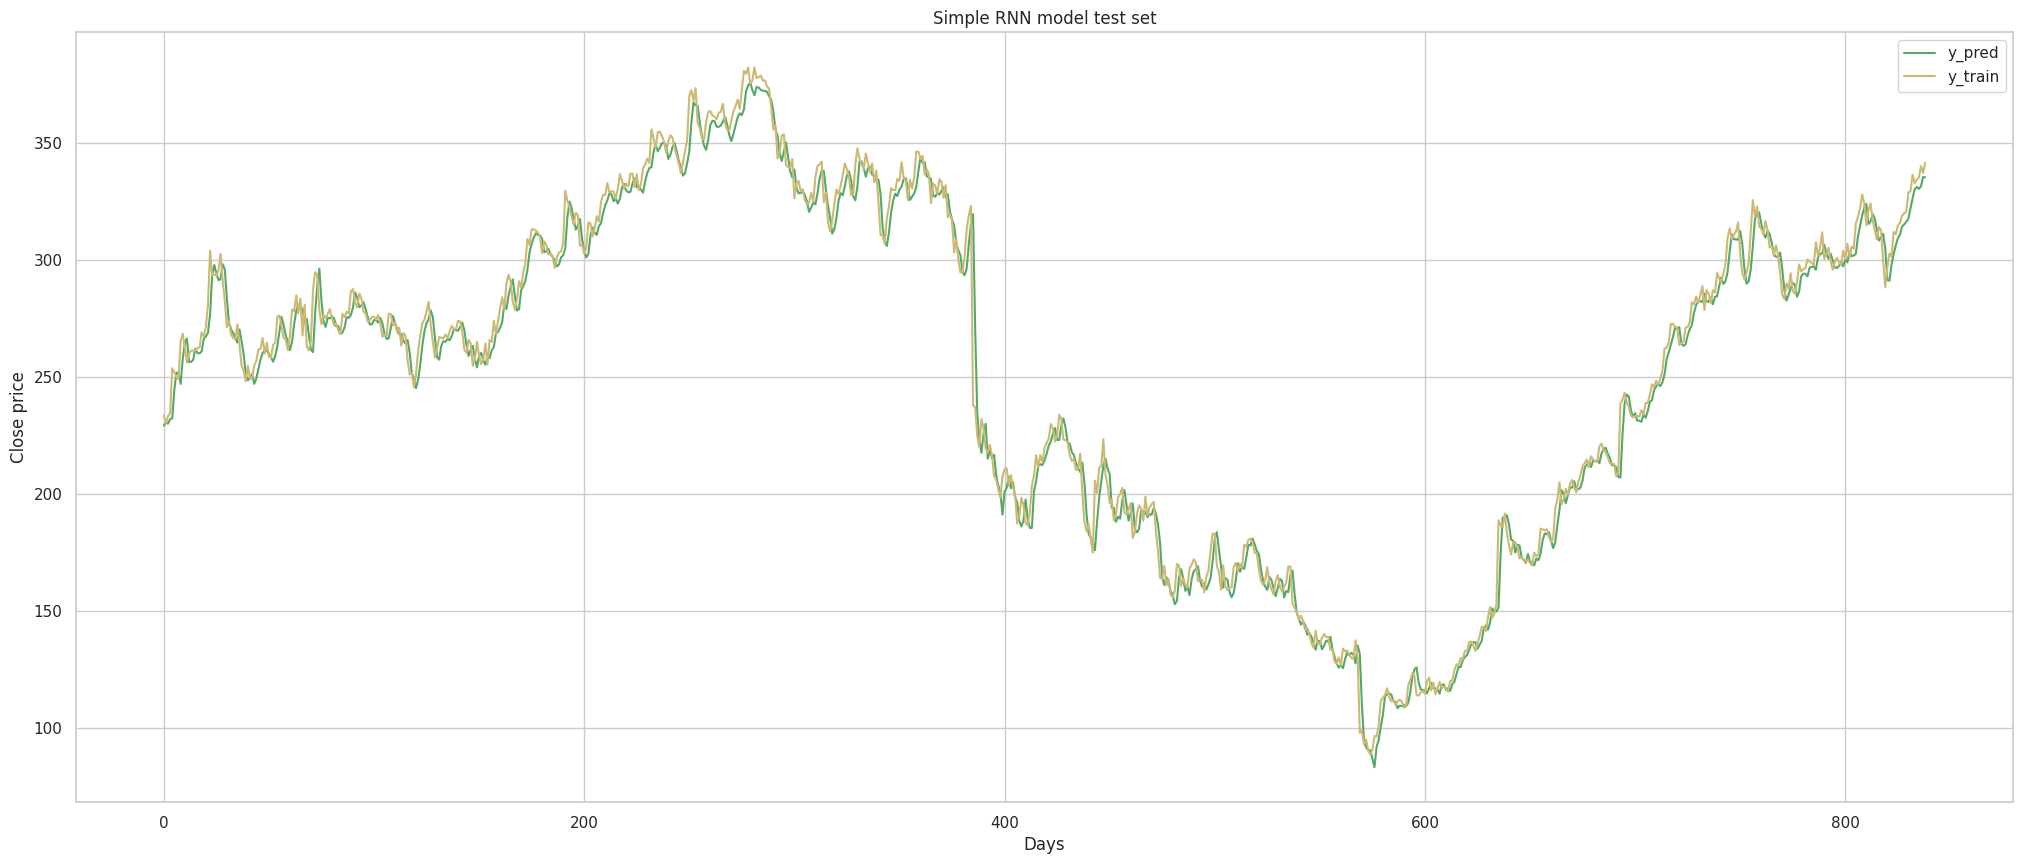

In [ ]:
y_test_pred_rnn1 = model_rnn1.predict(X_test)
y_test_pred_rnn1 = scaler.inverse_transform(y_test_pred_rnn1)

# Set the style to 'seaborn'
sns.set(style="whitegrid")
plt.figure(figsize = (25,10))
plt.plot(y_test_pred_rnn1, color = "g", label = "y_pred" )
plt.plot(y_test_original , color = "y", label = "y_train")
plt.xlabel("Days")
plt.ylabel("Close price")
plt.title("Simple RNN model test set")
plt.legend()
plt.show()

SGD optimizer

In [ ]:
model_rnn2 = Sequential()
model_rnn2.add(SimpleRNN(50, input_shape=(X_train.shape[1], 1)))
model_rnn2.add(Dense(1))
model_rnn2.compile(optimizer='SGD', loss='mean_squared_error')
history_simpleRNN_2 = model_rnn2.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
63/63 [==============================] - 1s 6ms/step - loss: 0.0096
Epoch 2/50
63/63 [==============================] - 0s 6ms/step - loss: 0.0010
Epoch 3/50
63/63 [==============================] - 0s 5ms/step - loss: 8.4320e-04
Epoch 4/50
63/63 [==============================] - 0s 6ms/step - loss: 7.0668e-04
Epoch 5/50
63/63 [==============================] - 0s 5ms/step - loss: 6.1385e-04
Epoch 6/50
63/63 [==============================] - 0s 5ms/step - loss: 5.4375e-04
Epoch 7/50
63/63 [==============================] - 0s 6ms/step - loss: 4.9535e-04
Epoch 8/50
63/63 [==============================] - 0s 4ms/step - loss: 4.6666e-04
Epoch 9/50
63/63 [==============================] - 0s 4ms/step - loss: 4.4228e-04
Epoch 10/50
63/63 [==============================] - 0s 4ms/step - loss: 4.2790e-04
Epoch 11/50
63/63 [==============================] - 0s 4ms/step - loss: 4.1563e-04
Epoch 12/50
63/63 [==============================] - 0s 4ms/step - loss: 4.0461e-04
Epoch 13/

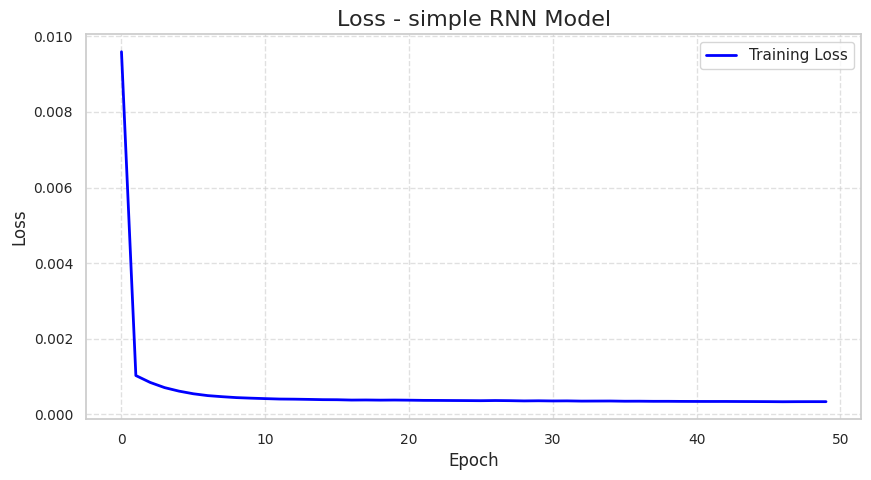

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history_simpleRNN_2.history["loss"], label="Training Loss", color='blue', linestyle='-', linewidth=2)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

plt.tick_params(axis='both', which='both', labelsize=10)
plt.title("Loss - simple RNN Model", fontsize=16)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Loss", fontsize=12)

plt.show()

63/63 [==============================] - 0s 2ms/step


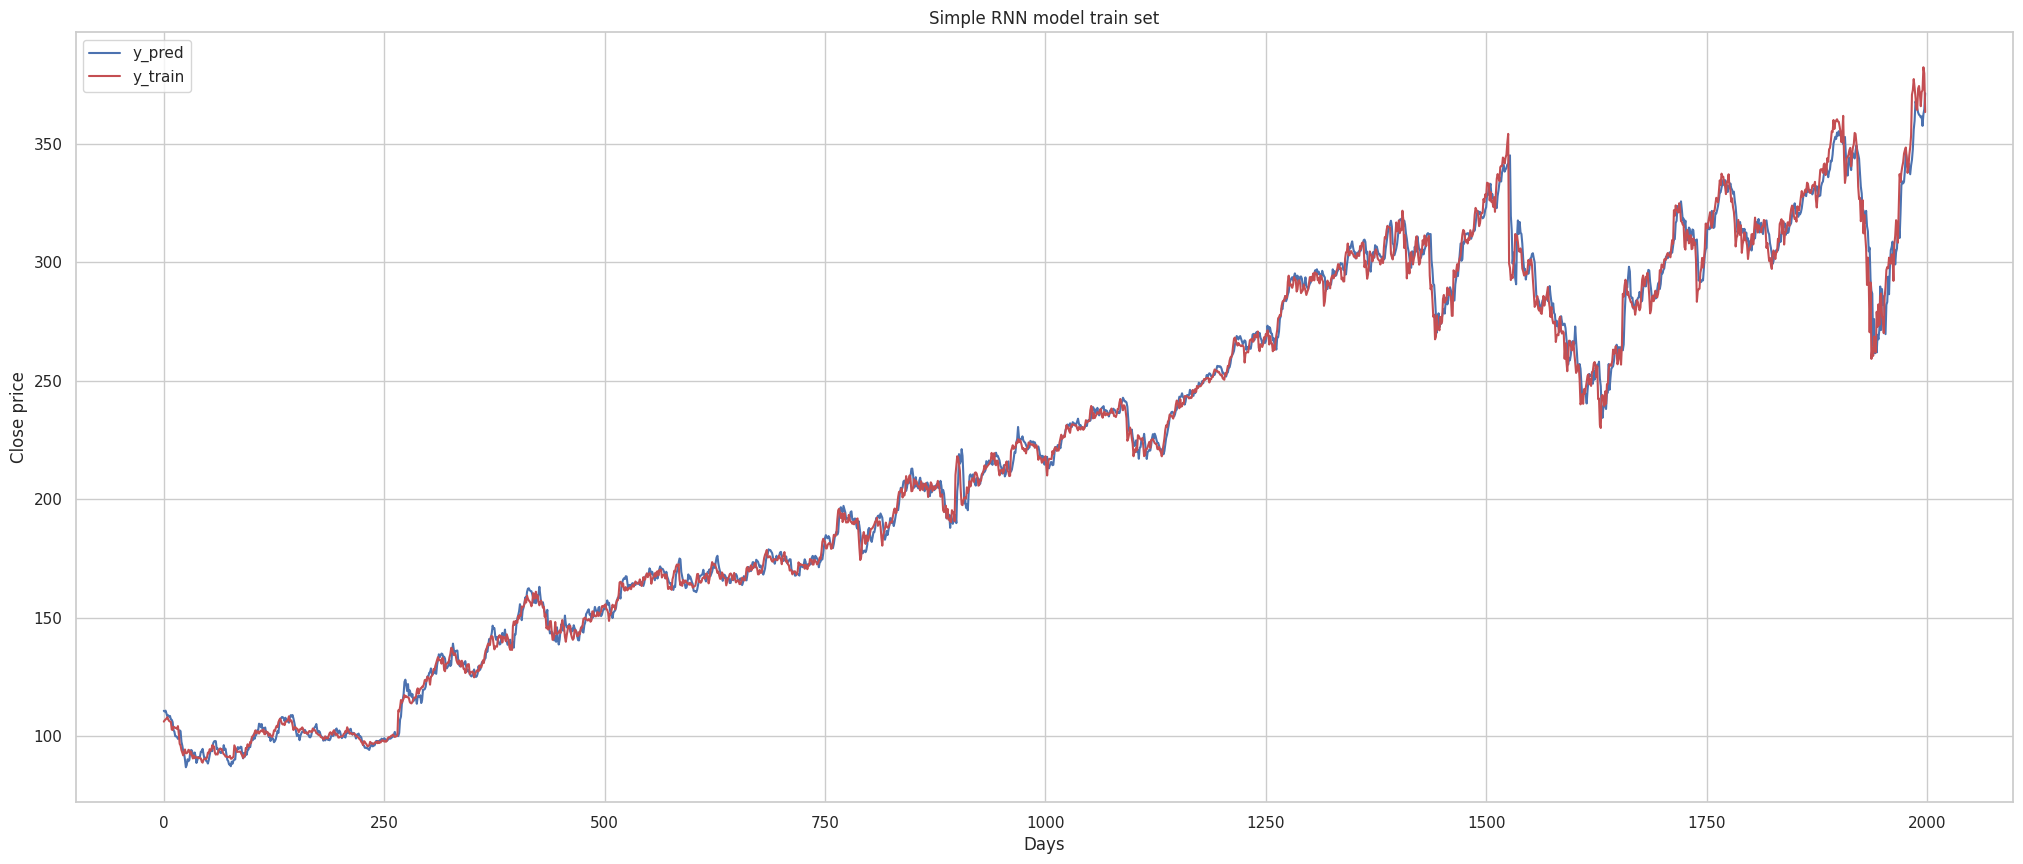

In [ ]:
y_train_pred_rnn2 = model_rnn2.predict(X_train)
y_train_pred_rnn2 = scaler.inverse_transform(y_train_pred_rnn2)

# Set the style to 'seaborn'
sns.set(style="whitegrid")
plt.figure(figsize = (25,10))
plt.plot(y_train_pred_rnn2, color = "b", label = "y_pred" )
plt.plot(y_train_original , color = "r", label = "y_train")
plt.xlabel("Days")
plt.ylabel("Close price")
plt.title("Simple RNN model train set")
plt.legend()
plt.show()

27/27 [==============================] - 0s 3ms/step


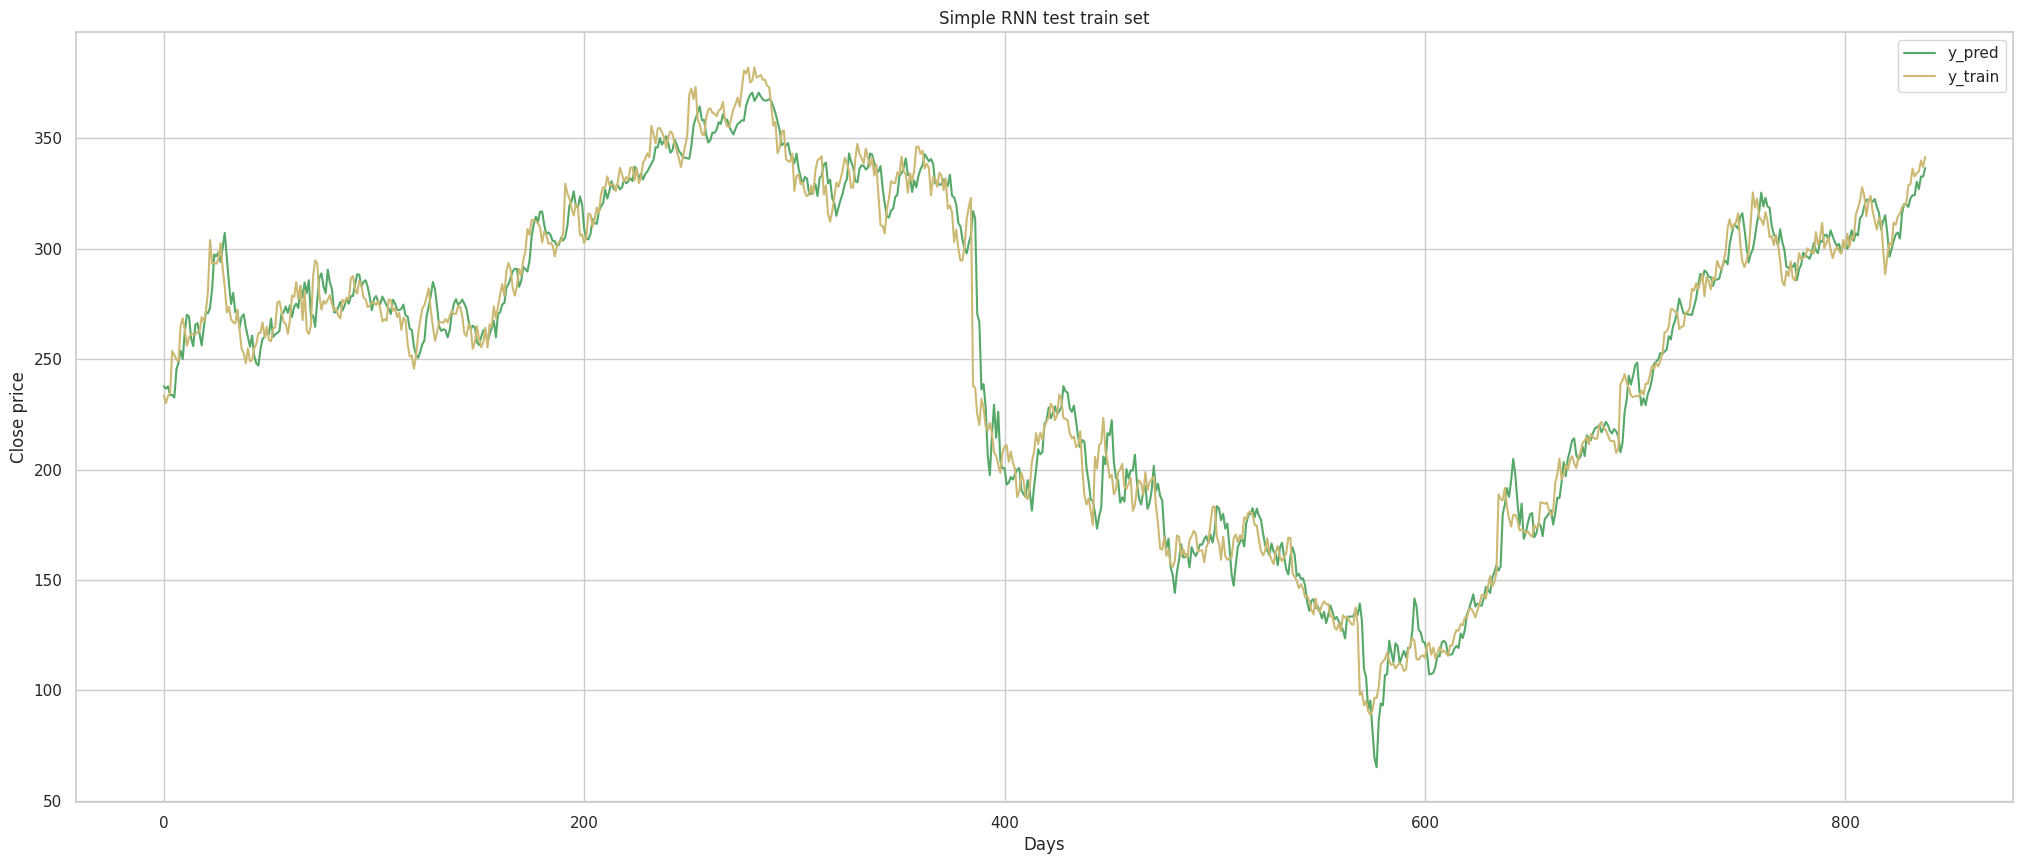

In [ ]:
y_test_pred_rnn2 = model_rnn2.predict(X_test)
y_test_pred_rnn2 = scaler.inverse_transform(y_test_pred_rnn2)

# Set the style to 'seaborn'
sns.set(style="whitegrid")
plt.figure(figsize = (25,10))
plt.plot(y_test_pred_rnn2, color = "g", label = "y_pred" )
plt.plot(y_test_original , color = "y", label = "y_train")
plt.xlabel("Days")
plt.ylabel("Close price")
plt.title("Simple RNN test train set")
plt.legend()
plt.show()

**LSTM**

ADAM optimizer

In [ ]:
# Define and train the LSTM model
model_lstm1 = Sequential()
model_lstm1.add(LSTM(50, input_shape=(X_train.shape[1], 1)))
model_lstm1.add(Dense(1))
model_lstm1.compile(optimizer='adam', loss='mean_squared_error')
model_lstm1.summary()
history_LSTM_1 = model_lstm1.fit(X_train, y_train, epochs=50, batch_size=32)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
63/63 [==============================] - 2s 10ms/step - loss: 0.0266
Epoch 2/50
63/63 [==============================] - 1s 10ms/step - loss: 6.0413e-04
Epoch 3/50
63/63 [==============================] - 1s 10ms/step - loss: 5.3942e-04
Epoch 4/50
63/63 [==============================] - 1s 9ms/step - loss: 5.2838e-04
Epoch 5/50
63/63 [==============================] - 1s 9ms/step - loss: 5.2049e-04


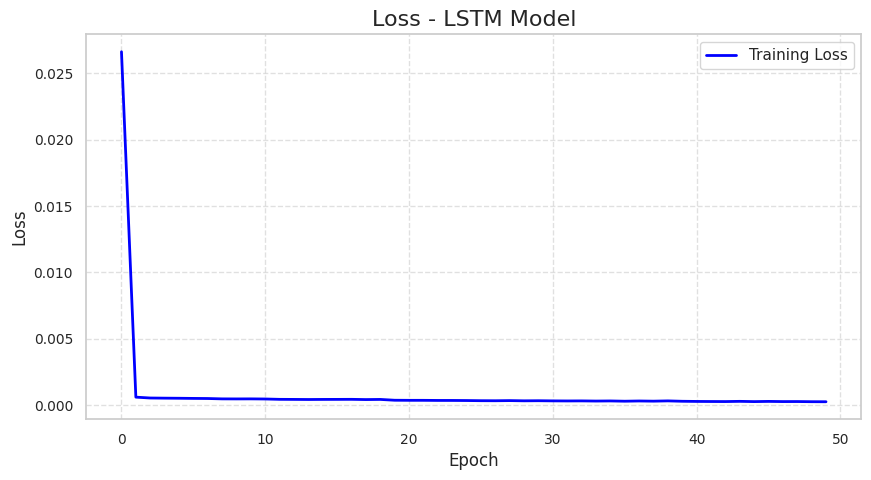

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history_LSTM_1.history["loss"], label="Training Loss", color='blue', linestyle='-', linewidth=2)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

plt.tick_params(axis='both', which='both', labelsize=10)
plt.title("Loss - LSTM Model", fontsize=16)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Loss", fontsize=12)

plt.show()


63/63 [==============================] - 0s 4ms/step


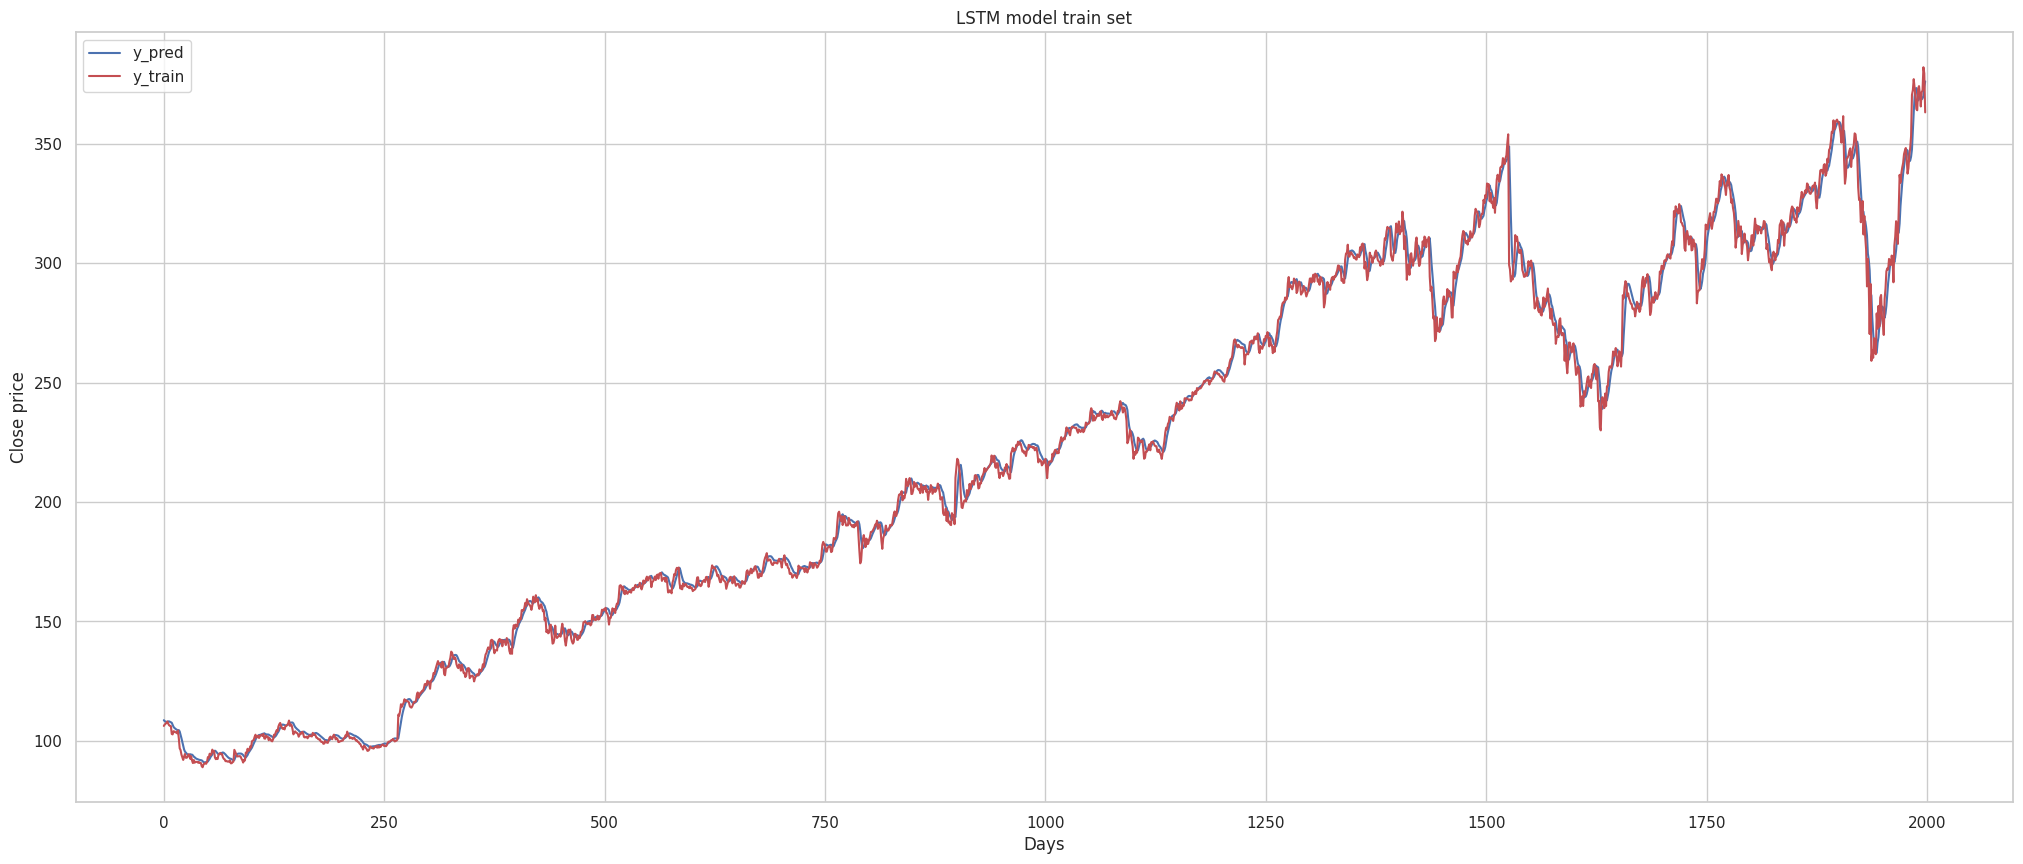

In [ ]:
y_train_pred_lstm1 = model_lstm1.predict(X_train)
y_train_pred_lstm1 = scaler.inverse_transform(y_train_pred_lstm1)

# Set the style to 'seaborn'
sns.set(style="whitegrid")
plt.figure(figsize = (25,10))
plt.plot(y_train_pred_lstm1, color = "b", label = "y_pred" )
plt.plot(y_train_original , color = "r", label = "y_train")
plt.xlabel("Days")
plt.ylabel("Close price")
plt.title("LSTM model train set")
plt.legend()
plt.show()

27/27 [==============================] - 0s 3ms/step


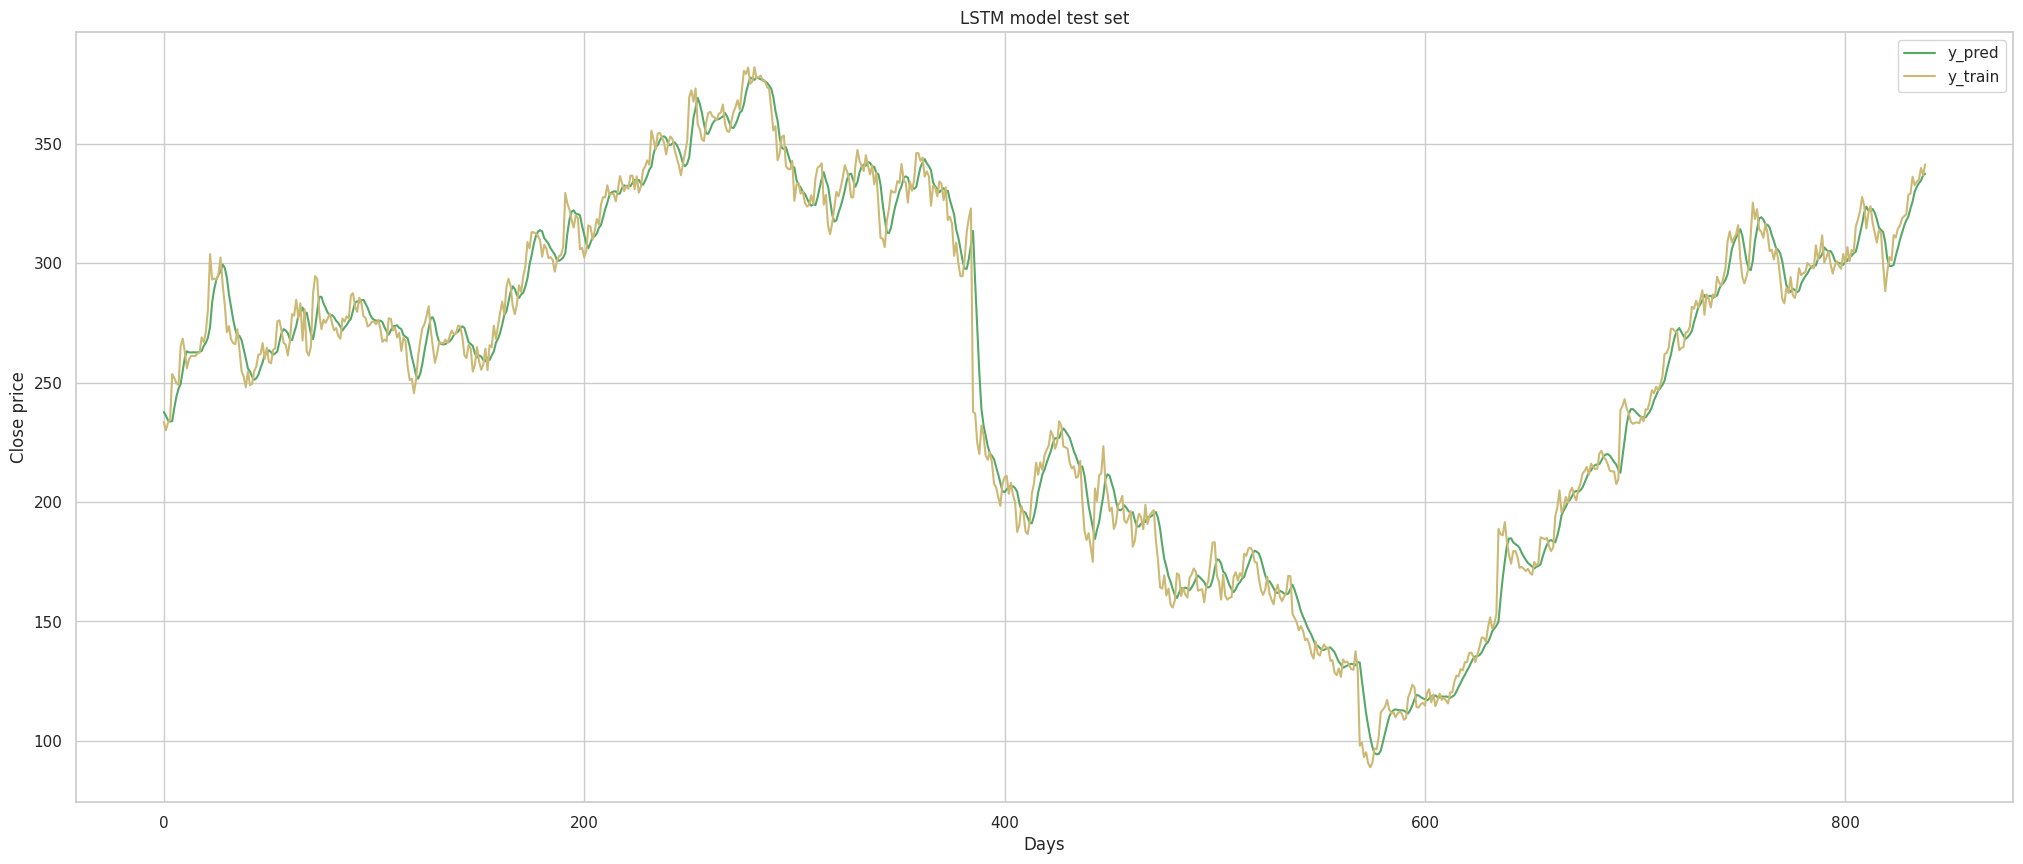

In [ ]:
y_test_pred_lstm1 = model_lstm1.predict(X_test)
y_test_pred_lstm1 = scaler.inverse_transform(y_test_pred_lstm1)

# Set the style to 'seaborn'
sns.set(style="whitegrid")
plt.figure(figsize = (25,10))
plt.plot(y_test_pred_lstm1, color = "g", label = "y_pred" )
plt.plot(y_test_original , color = "y", label = "y_train")
plt.xlabel("Days")
plt.ylabel("Close price")
plt.title("LSTM model test set")
plt.legend()
plt.show()

SGD optimizer

In [ ]:
# Define and train the LSTM model
model_lstm2 = Sequential()
model_lstm2.add(LSTM(50, input_shape=(X_train.shape[1], 1)))
model_lstm2.add(Dense(1))
model_lstm2.compile(optimizer='SGD', loss='mean_squared_error')
history_LSTM_2 = model_lstm2.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
63/63 [==============================] - 2s 13ms/step - loss: 0.1039
Epoch 2/50
63/63 [==============================] - 1s 10ms/step - loss: 0.0353
Epoch 3/50
63/63 [==============================] - 1s 14ms/step - loss: 0.0177
Epoch 4/50
63/63 [==============================] - 1s 10ms/step - loss: 0.0076
Epoch 5/50
63/63 [==============================] - 1s 9ms/step - loss: 0.0029
Epoch 6/50
63/63 [==============================] - 1s 10ms/step - loss: 0.0013
Epoch 7/50
63/63 [==============================] - 1s 10ms/step - loss: 8.6629e-04
Epoch 8/50
63/63 [==============================] - 1s 10ms/step - loss: 7.5992e-04
Epoch 9/50
63/63 [==============================] - 1s 10ms/step - loss: 7.3608e-04
Epoch 10/50
63/63 [==============================] - 1s 9ms/step - loss: 7.2895e-04
Epoch 11/50
63/63 [==============================] - 1s 9ms/step - loss: 7.2569e-04
Epoch 12/50
63/63 [==============================] - 1s 9ms/step - loss: 7.2224e-04
Epoch 13/50
63/63

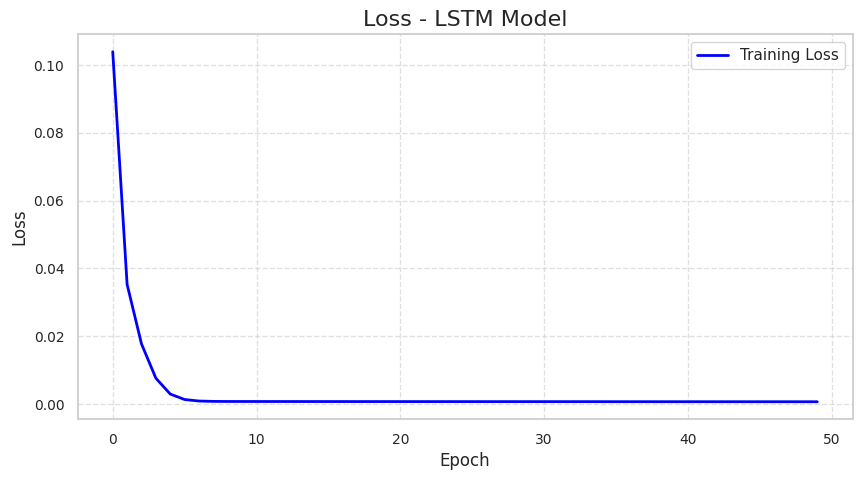

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history_LSTM_2.history["loss"], label="Training Loss", color='blue', linestyle='-', linewidth=2)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

plt.tick_params(axis='both', which='both', labelsize=10)
plt.title("Loss - LSTM Model", fontsize=16)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Loss", fontsize=12)

plt.show()


63/63 [==============================] - 0s 3ms/step


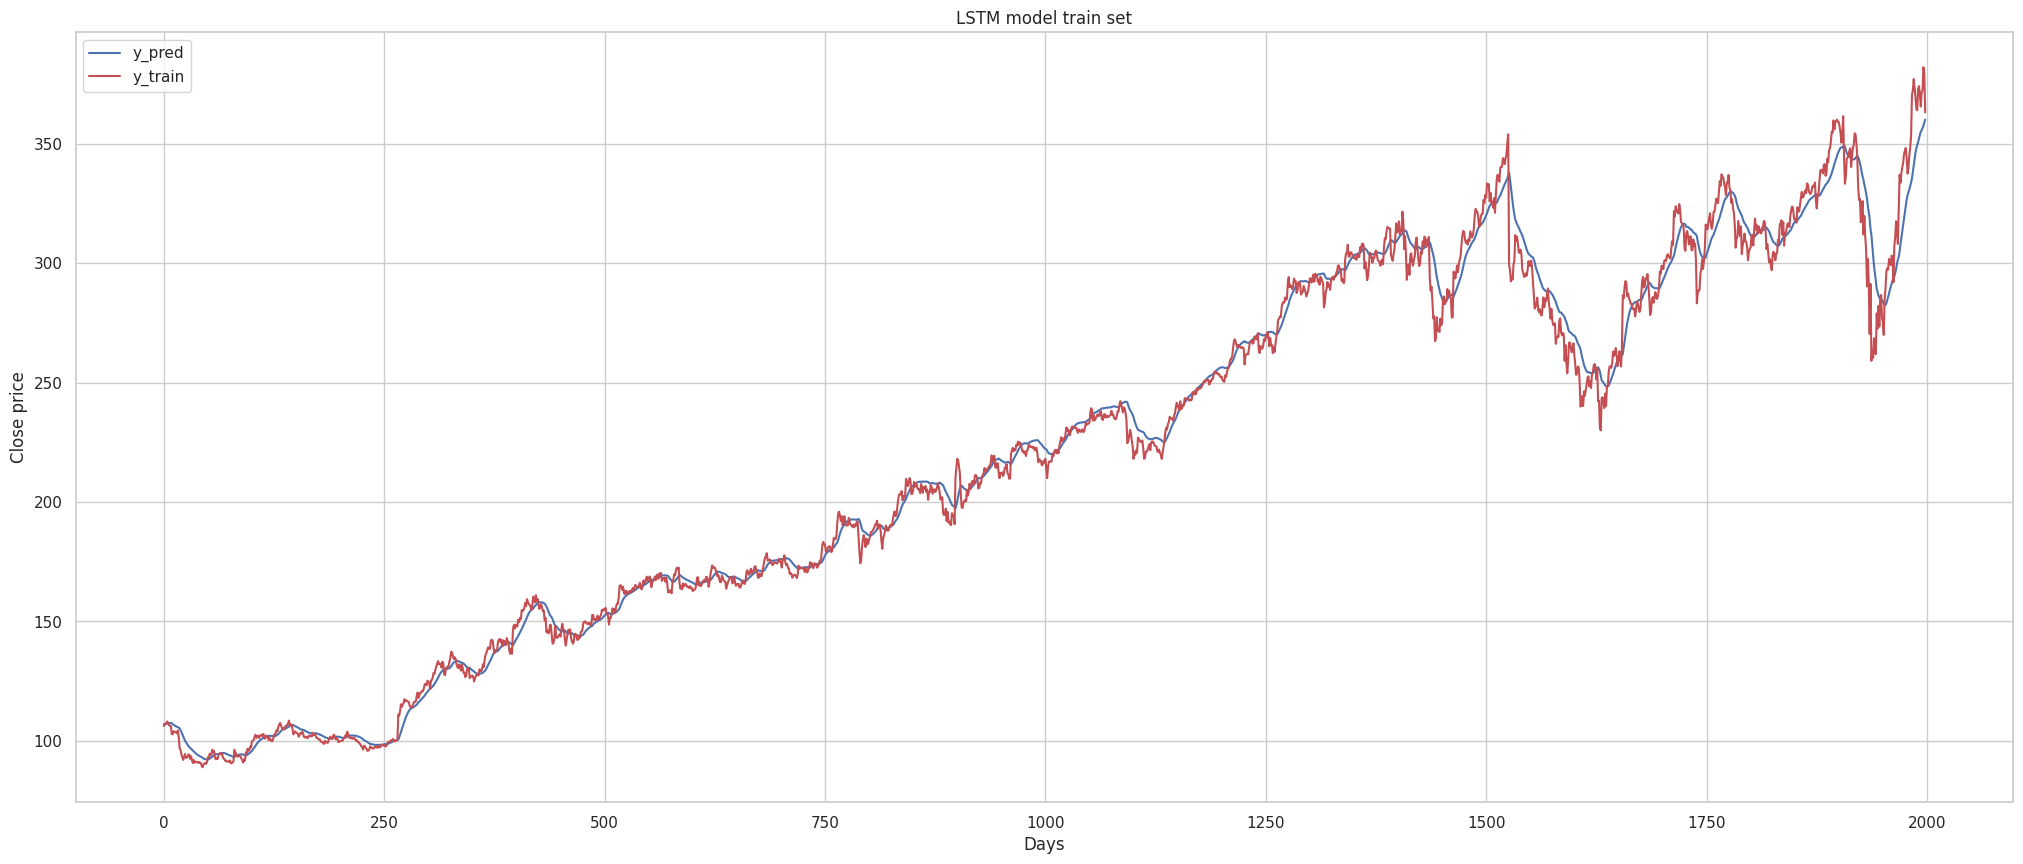

In [ ]:
y_train_pred_lstm2 = model_lstm2.predict(X_train)
y_train_pred_lstm2 = scaler.inverse_transform(y_train_pred_lstm2)

# Set the style to 'seaborn'
sns.set(style="whitegrid")
plt.figure(figsize = (25,10))
plt.plot(y_train_pred_lstm2, color = "b", label = "y_pred" )
plt.plot(y_train_original , color = "r", label = "y_train")
plt.xlabel("Days")
plt.ylabel("Close price")
plt.title("LSTM model train set")
plt.legend()
plt.show()

27/27 [==============================] - 0s 3ms/step


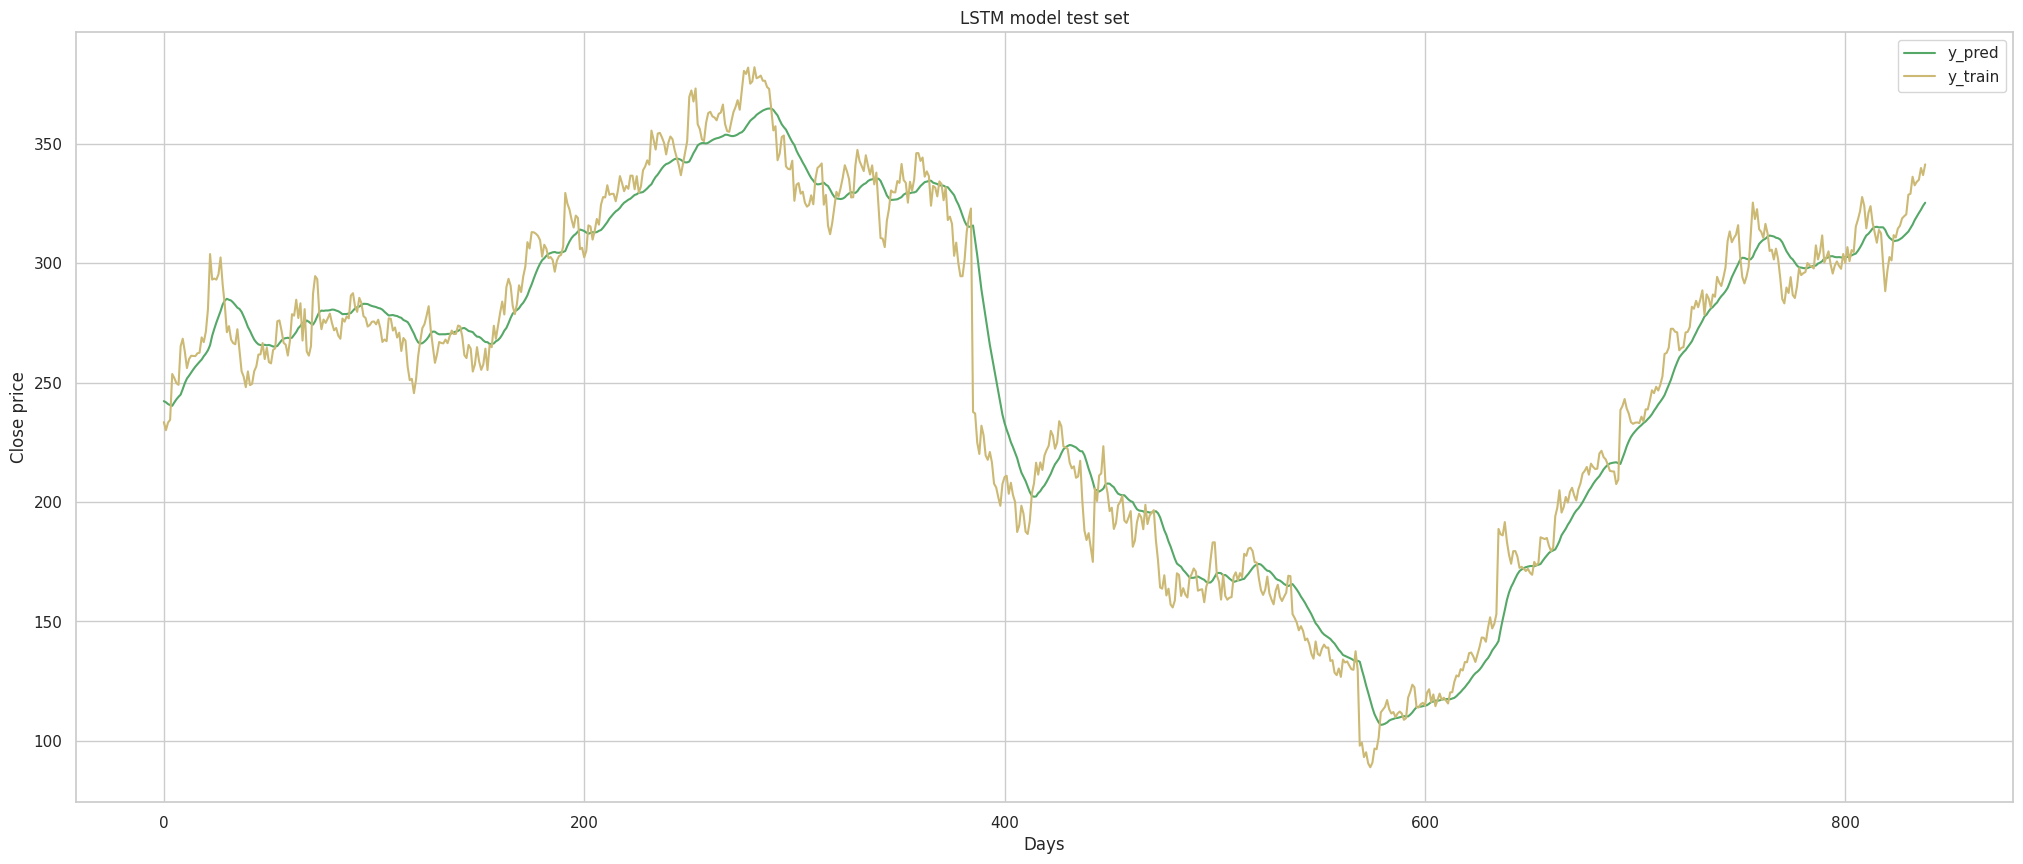

In [ ]:
y_test_pred_lstm2 = model_lstm2.predict(X_test)
y_test_pred_lstm2 = scaler.inverse_transform(y_test_pred_lstm2)

# Set the style to 'seaborn'
sns.set(style="whitegrid")
plt.figure(figsize = (25,10))
plt.plot(y_test_pred_lstm2, color = "g", label = "y_pred" )
plt.plot(y_test_original , color = "y", label = "y_train")
plt.xlabel("Days")
plt.ylabel("Close price")
plt.title("LSTM model test set")
plt.legend()
plt.show()

**GRU**

ADAM optimizer

In [ ]:
model_gru1 = Sequential()
model_gru1.add(GRU(50, input_shape=(X_train.shape[1], 1)))
model_gru1.add(Dense(1))
model_gru1.compile(optimizer='adam', loss='mean_squared_error')
model_gru1.summary()
history_GRU_1 = model_gru1.fit(X_train, y_train, epochs=50, batch_size=32)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 50)                7950      
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 8001 (31.25 KB)
Trainable params: 8001 (31.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
63/63 [==============================] - 3s 13ms/step - loss: 0.0429
Epoch 2/50
63/63 [==============================] - 1s 12ms/step - loss: 9.2626e-04
Epoch 3/50
63/63 [==============================] - 1s 10ms/step - loss: 3.0535e-04
Epoch 4/50
63/63 [==============================] - 1s 10ms/step - loss: 2.8691e-04
Epoch 5/50
63/63 [==============================] - 1s 10ms/step - loss: 2.7234e-04


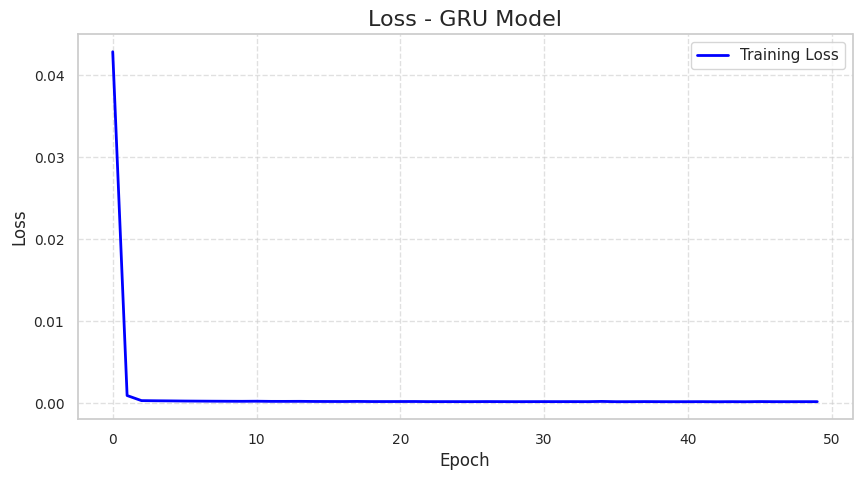

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history_GRU_1.history["loss"], label="Training Loss", color='blue', linestyle='-', linewidth=2)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

plt.tick_params(axis='both', which='both', labelsize=10)
plt.title("Loss - GRU Model", fontsize=16)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Loss", fontsize=12)

plt.show()

63/63 [==============================] - 0s 3ms/step


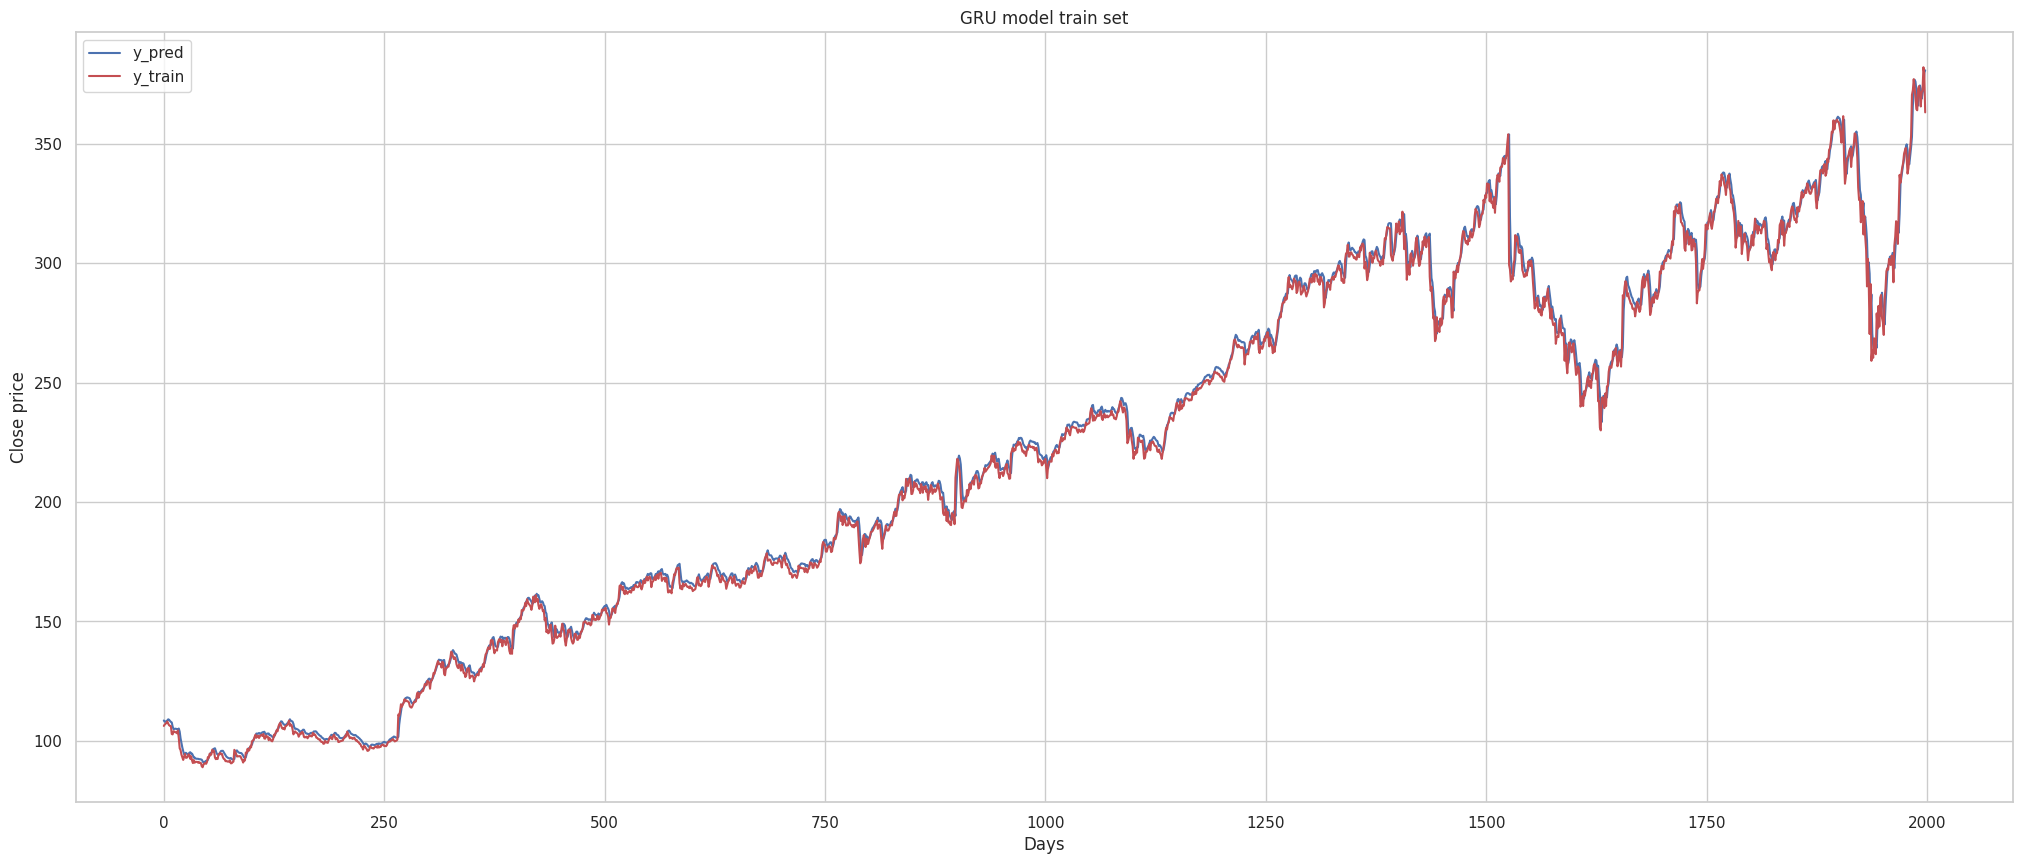

In [ ]:
y_train_pred_gru1 = model_gru1.predict(X_train)
y_train_pred_gru1 = scaler.inverse_transform(y_train_pred_gru1)

# Set the style to 'seaborn'
sns.set(style="whitegrid")
plt.figure(figsize = (25,10))
plt.plot(y_train_pred_gru1, color = "b", label = "y_pred" )
plt.plot(y_train_original , color = "r", label = "y_train")
plt.xlabel("Days")
plt.ylabel("Close price")
plt.title("GRU model train set")
plt.legend()
plt.show()

27/27 [==============================] - 0s 3ms/step


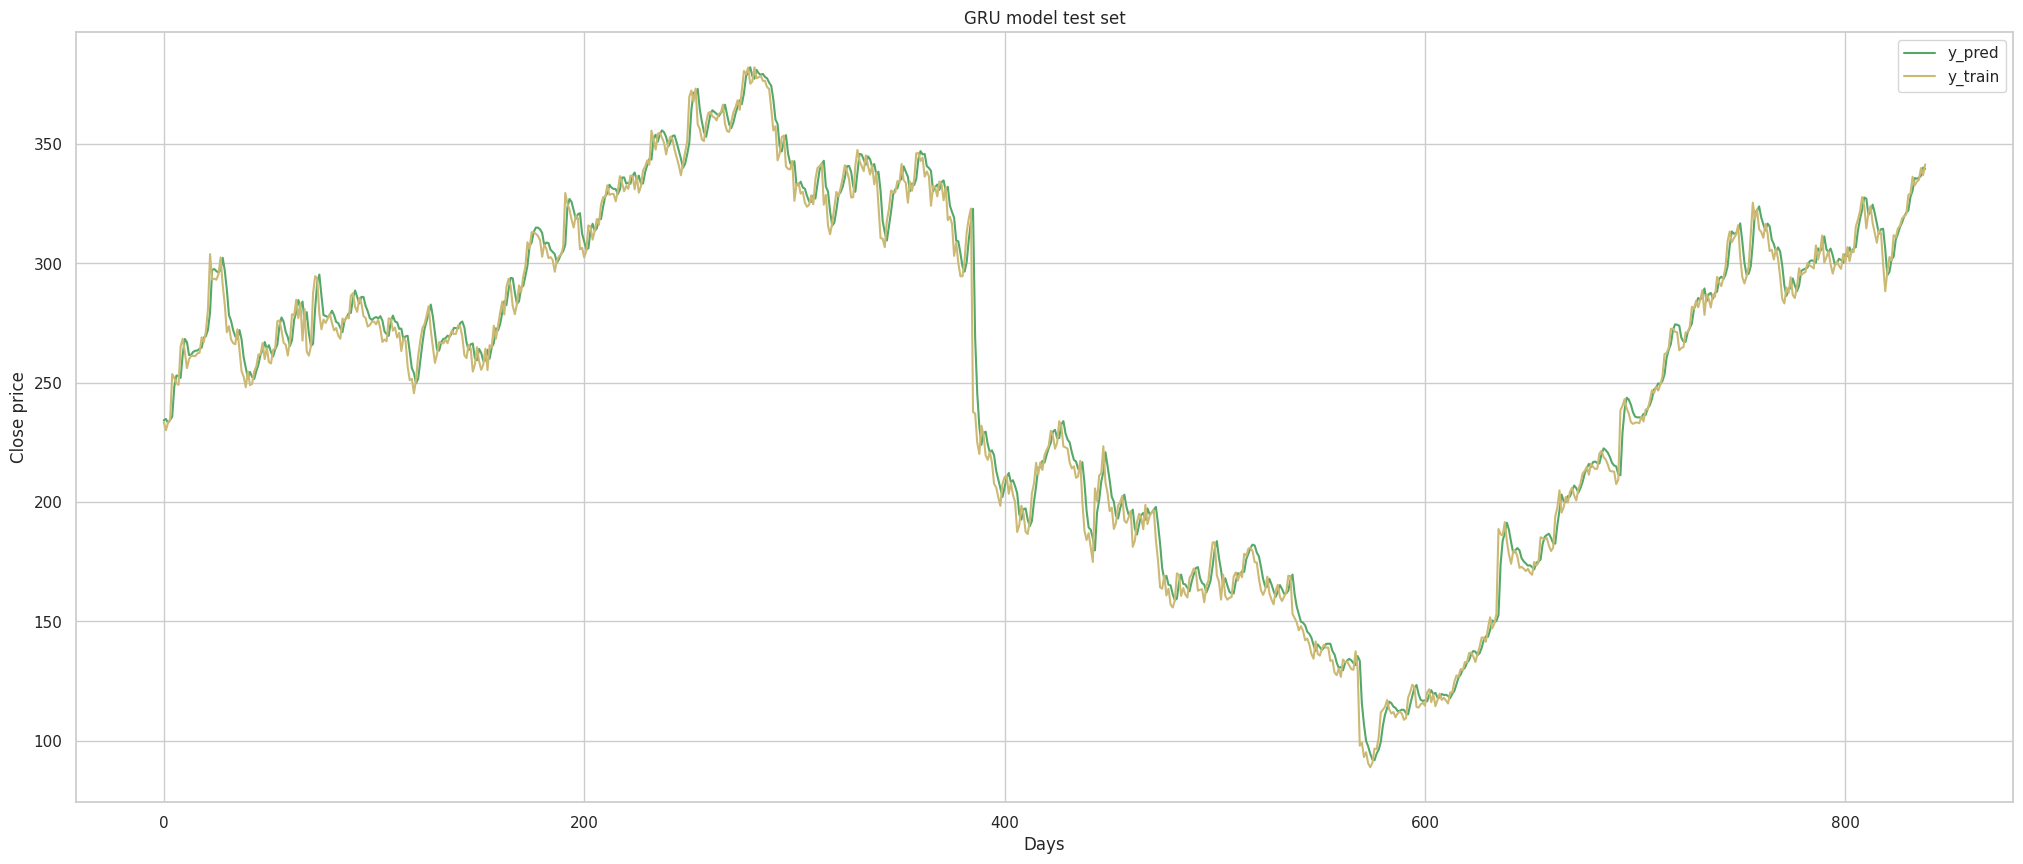

In [ ]:
y_test_pred_gru1 = model_gru1.predict(X_test)
y_test_pred_gru1 = scaler.inverse_transform(y_test_pred_gru1)

# Set the style to 'seaborn'
sns.set(style="whitegrid")
plt.figure(figsize = (25,10))
plt.plot(y_test_pred_gru1, color = "g", label = "y_pred" )
plt.plot(y_test_original , color = "y", label = "y_train")
plt.xlabel("Days")
plt.ylabel("Close price")
plt.title("GRU model test set")
plt.legend()
plt.show()

SGD optimizer

In [ ]:
model_gru2 = Sequential()
model_gru2.add(GRU(50, input_shape=(X_train.shape[1], 1)))
model_gru2.add(Dense(1))
model_gru2.compile(optimizer='SGD', loss='mean_squared_error')
history_GRU_2 = model_gru2.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
63/63 [==============================] - 2s 9ms/step - loss: 0.0528
Epoch 2/50
63/63 [==============================] - 1s 10ms/step - loss: 0.0211
Epoch 3/50
63/63 [==============================] - 1s 11ms/step - loss: 0.0127
Epoch 4/50
63/63 [==============================] - 1s 10ms/step - loss: 0.0075
Epoch 5/50
63/63 [==============================] - 1s 10ms/step - loss: 0.0044
Epoch 6/50
63/63 [==============================] - 1s 10ms/step - loss: 0.0025
Epoch 7/50
63/63 [==============================] - 1s 12ms/step - loss: 0.0015
Epoch 8/50
63/63 [==============================] - 1s 12ms/step - loss: 9.0490e-04
Epoch 9/50
63/63 [==============================] - 1s 13ms/step - loss: 5.8471e-04
Epoch 10/50
63/63 [==============================] - 1s 13ms/step - loss: 4.0988e-04
Epoch 11/50
63/63 [==============================] - 1s 10ms/step - loss: 3.1720e-04
Epoch 12/50
63/63 [==============================] - 1s 10ms/step - loss: 2.6767e-04
Epoch 13/50
63/63 

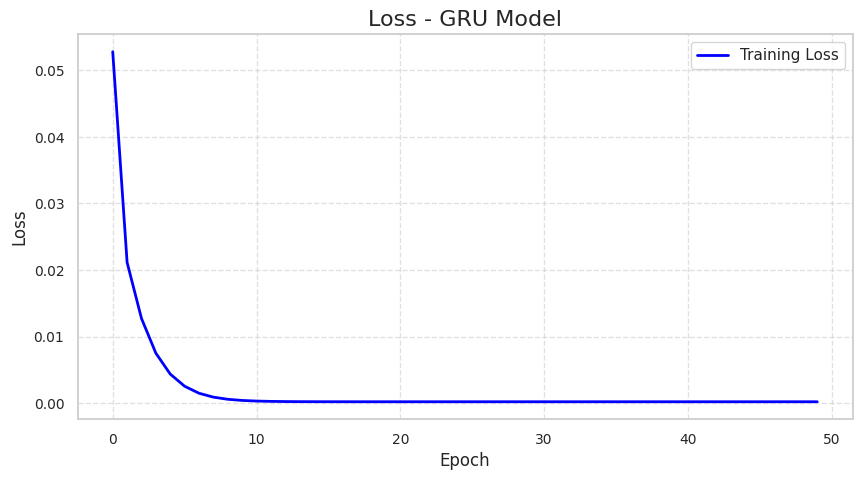

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history_GRU_2.history["loss"], label="Training Loss", color='blue', linestyle='-', linewidth=2)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

plt.tick_params(axis='both', which='both', labelsize=10)
plt.title("Loss - GRU Model", fontsize=16)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Loss", fontsize=12)

plt.show()


63/63 [==============================] - 0s 3ms/step


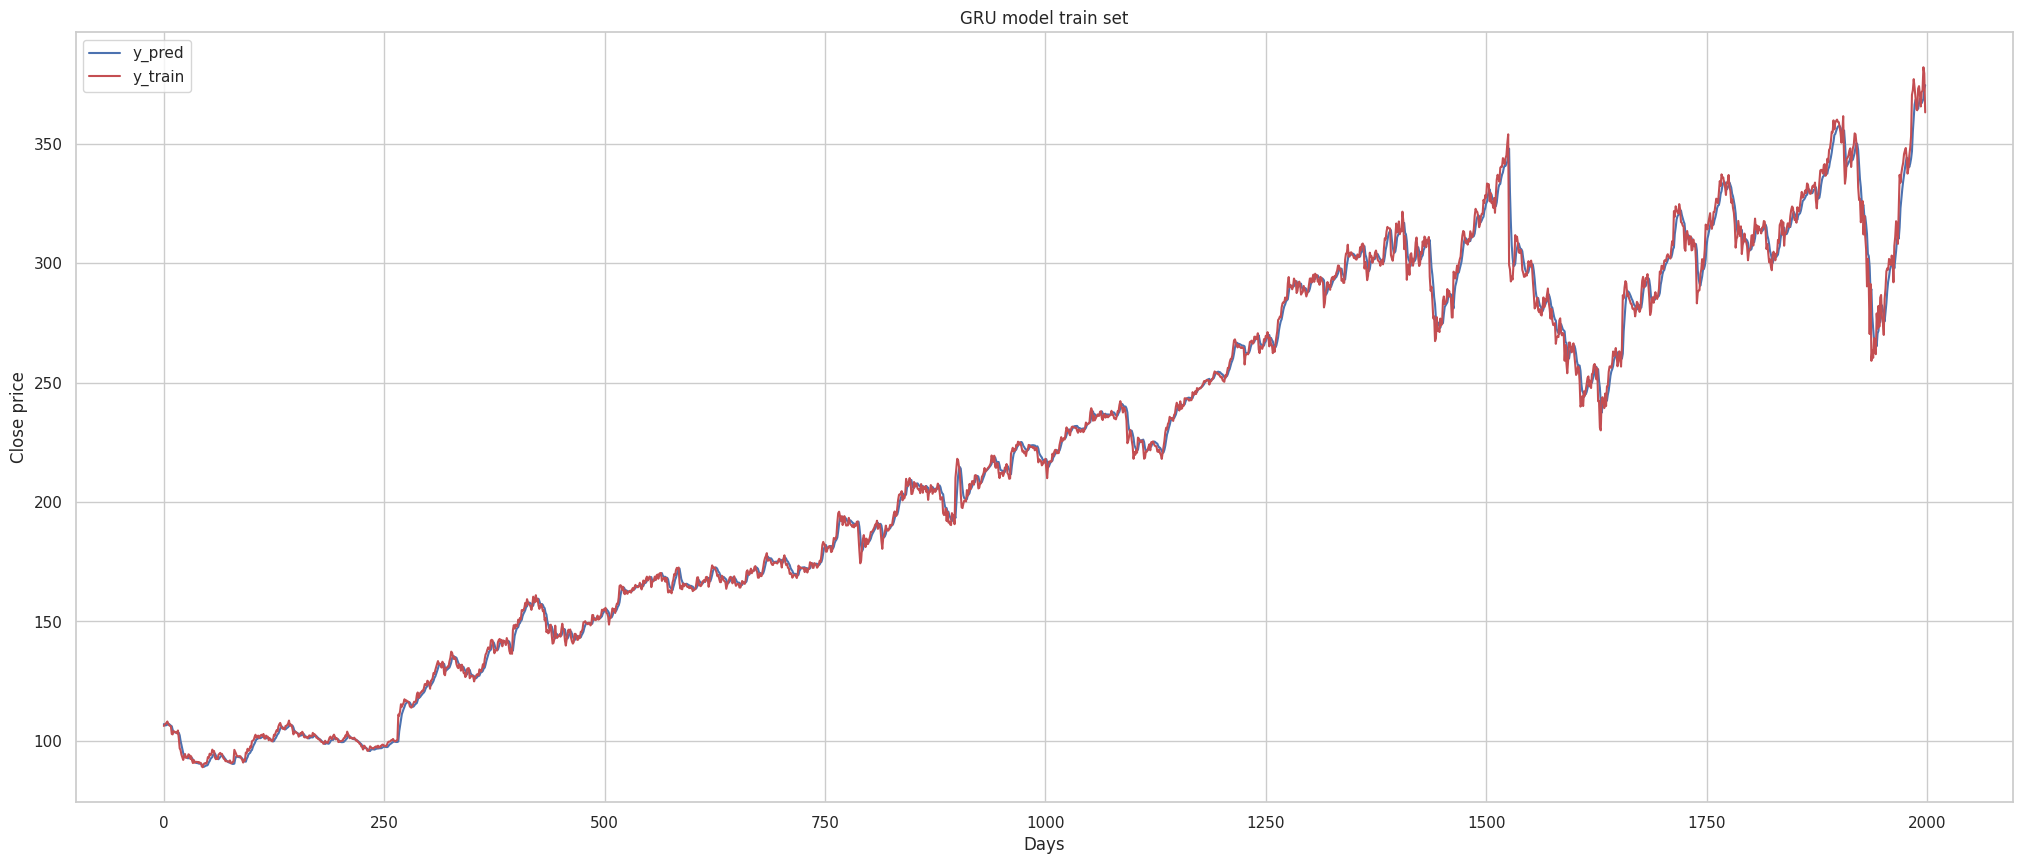

In [ ]:
y_train_pred_gru2 = model_gru2.predict(X_train)
y_train_pred_gru2 = scaler.inverse_transform(y_train_pred_gru2)

# Set the style to 'seaborn'
sns.set(style="whitegrid")
plt.figure(figsize = (25,10))
plt.plot(y_train_pred_gru2, color = "b", label = "y_pred" )
plt.plot(y_train_original , color = "r", label = "y_train")
plt.xlabel("Days")
plt.ylabel("Close price")
plt.title("GRU model train set")
plt.legend()
plt.show()

27/27 [==============================] - 0s 3ms/step


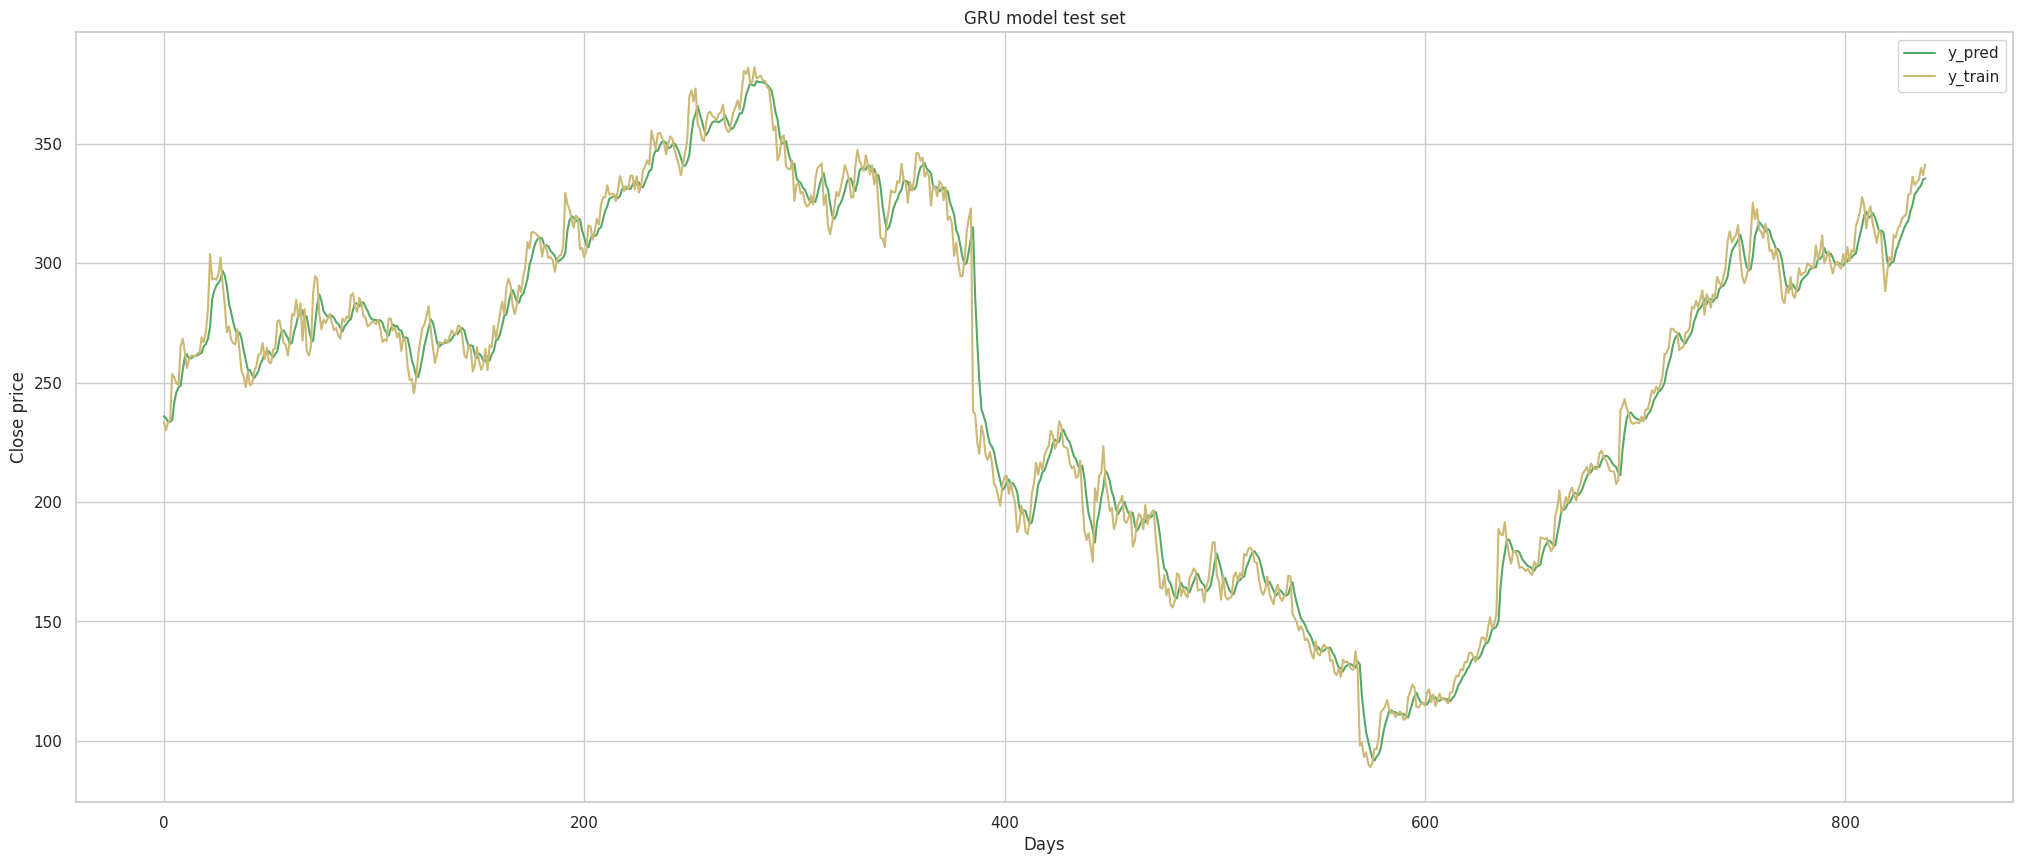

In [ ]:
y_test_pred_gru2 = model_gru2.predict(X_test)
y_test_pred_gru2 = scaler.inverse_transform(y_test_pred_gru2)

# Set the style to 'seaborn'
sns.set(style="whitegrid")
plt.figure(figsize = (25,10))
plt.plot(y_test_pred_gru2, color = "g", label = "y_pred" )
plt.plot(y_test_original , color = "y", label = "y_train")
plt.xlabel("Days")
plt.ylabel("Close price")
plt.title("GRU model test set")
plt.legend()
plt.show()

Evaluate the models with loss from scale [0-1]

In [ ]:
# Evaluate the models with loss from scale [0-1]
loss_rnn1 = model_rnn1.evaluate(X_test, y_test)
loss_lstm1 = model_lstm1.evaluate(X_test, y_test)
loss_gru1 = model_gru1.evaluate(X_test, y_test)

loss_rnn2 = model_rnn2.evaluate(X_test, y_test)
loss_lstm2 = model_lstm2.evaluate(X_test, y_test)
loss_gru2 = model_gru2.evaluate(X_test, y_test)

print(f'SimpleRNN Test Loss: {loss_rnn1}')
print(f'LSTM Test Loss: {loss_lstm1}')
print(f'GRU Test Loss: {loss_gru1}')

print(f'SimpleRNN Test Loss: {loss_rnn2}')
print(f'LSTM Test Loss: {loss_lstm2}')
print(f'GRU Test Loss: {loss_gru2}')

27/27 [==============================] - 0s 3ms/step - loss: 8.0422e-04
SimpleRNN Test Loss: 0.0006752875633537769
LSTM Test Loss: 0.0009256975026801229
GRU Test Loss: 0.0006385727901943028
SimpleRNN Test Loss: 0.0013657892122864723
LSTM Test Loss: 0.002280130749568343
GRU Test Loss: 0.000804219045676291


Evaluate the models with loss from scale original

In [ ]:
# Evaluate the models with loss from scale [0-1]
loss_rnn1 = np.mean(np.abs(y_train_pred_rnn1 - y_train_original))
loss_lstm1 = np.mean(np.abs(y_train_pred_lstm1 - y_train_original))
loss_gru1 = np.mean(np.abs(y_train_pred_gru1 - y_train_original))

loss_rnn2 = np.mean(np.abs(y_train_pred_rnn2 - y_train_original))
loss_lstm2 = np.mean(np.abs(y_train_pred_lstm2 - y_train_original))
loss_gru2 = np.mean(np.abs(y_train_pred_gru2 - y_train_original))

print(f'SimpleRNN Test Loss: {loss_rnn1}')
print(f'LSTM Test Loss: {loss_lstm1}')
print(f'GRU Test Loss: {loss_gru1}')

print(f'SimpleRNN Test Loss: {loss_rnn2}')
print(f'LSTM Test Loss: {loss_lstm2}')
print(f'GRU Test Loss: {loss_gru2}')

SimpleRNN Test Loss: 2.7092888023341173
LSTM Test Loss: 2.9009036056955235
GRU Test Loss: 2.695495278478998
SimpleRNN Test Loss: 3.5005145183884663
LSTM Test Loss: 4.917160986923659
GRU Test Loss: 2.682317172365464


In [ ]:
# Evaluate the models with loss from scale [0-1]
loss_rnn1 = np.mean(np.abs(y_test_pred_rnn1 - y_test_original))
loss_lstm1 = np.mean(np.abs(y_test_pred_lstm1 - y_test_original))
loss_gru1 = np.mean(np.abs(y_test_pred_gru1 - y_test_original))

loss_rnn2 = np.mean(np.abs(y_test_pred_rnn2 - y_test_original))
loss_lstm2 = np.mean(np.abs(y_test_pred_lstm2 - y_test_original))
loss_gru2 = np.mean(np.abs(y_test_pred_gru2 - y_test_original))

print(f'SimpleRNN Test Loss: {loss_rnn1}')
print(f'LSTM Test Loss: {loss_lstm1}')
print(f'GRU Test Loss: {loss_gru1}')

print(f'SimpleRNN Test Loss: {loss_rnn2}')
print(f'LSTM Test Loss: {loss_lstm2}')
print(f'GRU Test Loss: {loss_gru2}')

SimpleRNN Test Loss: 5.391200678283182
LSTM Test Loss: 6.37019625494392
GRU Test Loss: 5.157043311536241
SimpleRNN Test Loss: 7.910820689332073
LSTM Test Loss: 10.198718147141431
GRU Test Loss: 5.932342638418132
